## Import modules

In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 21.6 MB/s eta 0:00:00


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [56]:
df = pd.read_csv('Train_preprocessed10.csv')

In [57]:
df = df.drop(['Unnamed: 0'], axis=1)

In [58]:
df.head()

,Item_Weight,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2,log_Item_MRP,log_Outlet_Years
0,9.30,8.225808,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.015920,1,0,5.524692,2.708050
1,5.92,6.096776,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019095,0,0,3.897299,1.609438
2,17.50,7.648868,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.016621,1,0,4.960170,2.708050
3,19.20,6.597664,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064037,0,0,5.210005,2.772589
4,8.93,6.903451,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.064037,0,0,4.004810,3.295837


In [11]:
df.shape

(8523, 40)

In [95]:
## 타겟변수 로그변환 해제
y_ = np.expm1(df['Item_Outlet_Sales'])

In [59]:
y = df['Item_Outlet_Sales']

In [60]:
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [107]:
X.head()

,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2,log_Item_MRP,log_Outlet_Years
0,9.30,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.015920,1,0,5.524692,2.708050
1,5.92,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019095,0,0,3.897299,1.609438
2,17.50,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.016621,1,0,4.960170,2.708050
3,19.20,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064037,0,0,5.210005,2.772589
4,8.93,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.064037,0,0,4.004810,3.295837


## Preprocessing the dataset

In [115]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [116]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'log_Item_Visibility', 'Type1_Tear1', 'Type1_Tear2', 'log_Item_MRP',
       'log_Outlet_Years'],
      dtype='object')

In [117]:
X.head()

,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2,log_Item_MRP,log_Outlet_Years
0,9.30,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.015920,1,0,5.524692,2.708050
1,5.92,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019095,0,0,3.897299,1.609438
2,17.50,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.016621,1,0,4.960170,2.708050
3,19.20,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064037,0,0,5.210005,2.772589
4,8.93,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.064037,0,0,4.004810,3.295837


### PCA

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 24)
X_pca = pca.fit_transform(X) #정규화된 데이터를 사용
X_pca = pd.DataFrame(X_pca)

In [162]:
X_norm = X_pca

### Scaler

In [118]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'log_Item_Visibility', 'Type1_Tear1', 'Type1_Tear2', 'log_Item_MRP',
       'log_Outlet_Years'],
      dtype='object')

In [119]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'log_Item_MRP', 'log_Outlet_Years', 'log_Item_Visibility']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Type1_Tear1', 'Type1_Tear2']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

In [120]:
X_norm.shape

(8523, 41)

In [ ]:
def objective(trial: Trial) -> float:
    params_ = {
        
    }

In [121]:
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

## Model Training

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
#     train the model
    model.fit(X, y)
    
#     # predict the training set
#     pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

In [85]:
from sklearn.model_selection import KFold

In [152]:
def train2(model, X, y):
    # 교차검증을 위해 KFold 객체를 생성합니다.
    kf = KFold(n_splits=5, shuffle=True, random_state=77)

    # 각 fold마다 score를 저장할 리스트를 생성합니다.
    scores = []
    scores_ = []

    # 각 fold마다 학습 및 예측을 진행합니다.
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 모델을 학습합니다.
        model.fit(X_train, y_train)

        # 예측값을 계산합니다.
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        
        scores.append(mse)
        
        ###
        
        y_pred_ = np.expm1(y_pred)
        y_test_ = np.expm1(y_test)

        # MSE를 계산합니다.
        mse_ = mean_squared_error(y_test_, y_pred_)

        # 각 fold의 MSE를 scores 리스트에 저장합니다.
        scores_.append(mse_)
 
        
    # scores 리스트에 저장된 각 fold의 MSE를 평균내어 최종 score를 계산합니다.
    cv_score = np.abs(np.mean(scores))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    # scores 리스트에 저장된 각 fold의 MSE를 평균내어 최종 score를 계산합니다.
    cv_score_ = np.abs(np.mean(scores_))
    rmse_ = np.mean(np.sqrt(np.abs(cv_score_)))
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)
    print("Model Report")
    print("MSE:", cv_score_)
    print("RMSE:", rmse_)
    
           


    y_error = y_test - y_pred

    # create a scatter plot
    plt.scatter(y_test, y_error)

    # add axis labels and a title
    plt.xlabel('y_test_log')
    plt.ylabel('y_error_log')

    # show the plot
    plt.show()


    y_error_ = y_test_ - y_pred_



    # create a scatter plot
    plt.scatter(list(y_test_), list(y_error_))

    # add axis labels and a title
    plt.xlabel('y_test')
    plt.ylabel('y_error')

    plt.show


### Linear

Model Report
MSE: 0.2684968922347012
RMSE: 0.5181668575224598
Model Report
MSE: 1218309.2221195921
RMSE: 1103.7704571692395


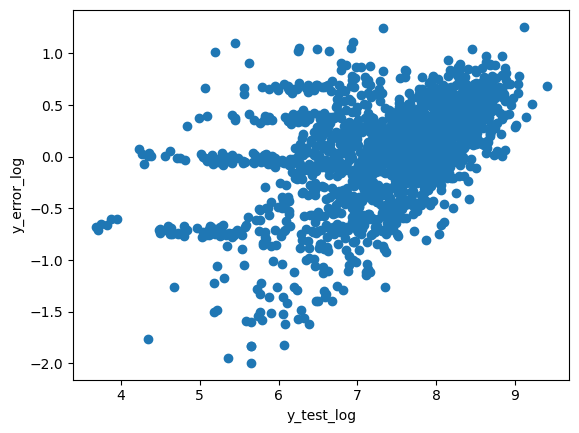

<AxesSubplot:title={'center':'Model Coefficients'}, xlabel='y_test', ylabel='y_error'>

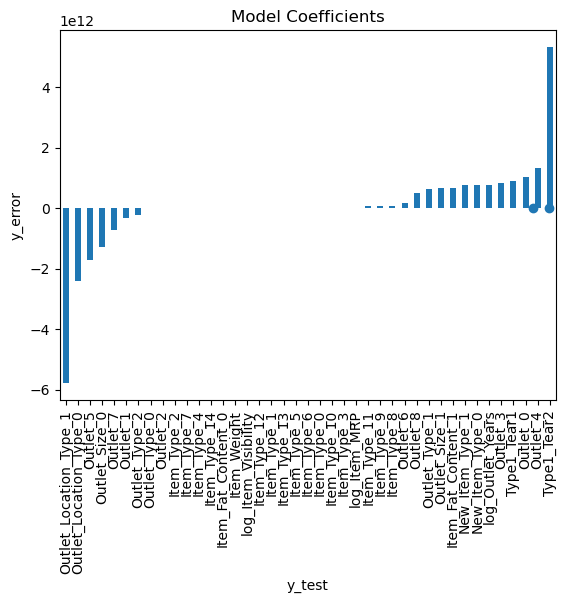

In [153]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(fit_intercept=True)
train2(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.26804140783076835
RMSE: 0.5177271557787638
Model Report
MSE: 1219401.793201508
RMSE: 1104.2652730216178


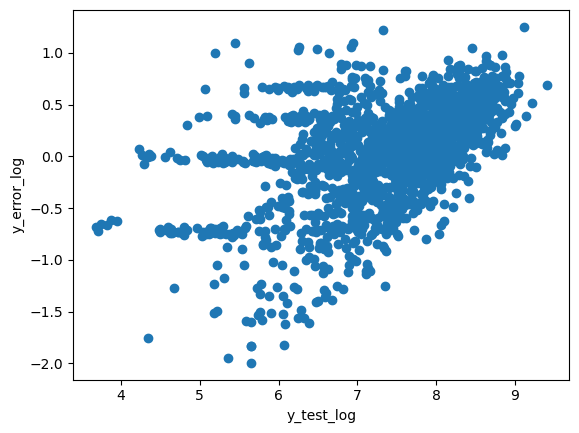

<AxesSubplot:title={'center':'Model Coefficients'}, xlabel='y_test', ylabel='y_error'>

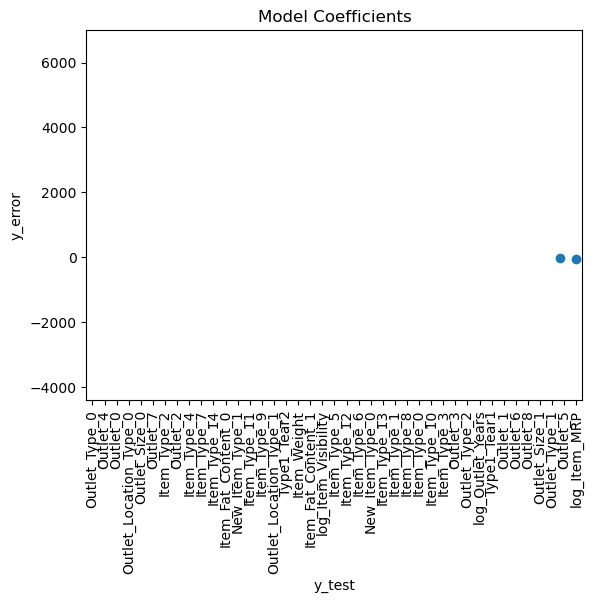

In [150]:
model = Ridge(alpha=10, max_iter=1000, solver='saga', fit_intercept=True, tol=0.001)
train2(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [43]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [176]:
param_grid = {
    'alpha':[0.001, 0.01, 0.1, 1, 10, 50, 100],
    'fit_intercept':[True, False],
    'max_iter':[1000],
    'tol':[1e-6, 1e-5, 1e-4, 1e-3],
    'solver':['saga']
}

In [72]:
param_grid = {
    'alpha':[0.001, 0.01, 0.1, 1, 10, 50, 100],
    'fit_intercept':[True, False],
    'max_iter':[1000],
    'tol':[1e-6, 1e-5, 1e-4, 1e-3]
}

In [82]:
param_grid = {
    'max_depth':[5,10,20,30],
    'max_features':[20, 35, 50]
}

In [92]:
param_grid = {
    'bootstrap':[True],
    'max_depth':[5],
    'max_features':[35],
    'n_estimators':[200]
}

In [115]:
param_grid = {
    'C':[0.0001, 0.01, 0.1, 1, 10],
    'epsilon':[0.0001, 0.01, 0.1, 1, 10],
    'kernel':['linear']
}

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
model=Ridge()

In [179]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_norm, y)

best_estimator = grid_search.best_estimator_

print(best_estimator)

df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_

Ridge(alpha=10, max_iter=1000, solver='saga', tol=0.0001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_max_iter,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105808,0.020524,0.000933,0.000287,0.001,True,1000,saga,0.000001,"{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-06}",-0.294431,-0.299198,-0.283934,-0.288914,-0.280405,-0.289377,0.006817,20
1,0.078143,0.007172,0.000703,0.000015,0.001,True,1000,saga,0.00001,"{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-05}",-0.294431,-0.299198,-0.283934,-0.288914,-0.280405,-0.289376,0.006817,18
2,0.044112,0.008198,0.000900,0.000166,0.001,True,1000,saga,0.0001,"{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 0.0001}",-0.294430,-0.299195,-0.283934,-0.288914,-0.280409,-0.289376,0.006815,19
3,0.023348,0.003771,0.000740,0.000037,0.001,True,1000,saga,0.001,"{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 0.001}",-0.294418,-0.299169,-0.283934,-0.288912,-0.280392,-0.289365,0.006810,11
4,0.129113,0.004597,0.000751,0.000045,0.001,False,1000,saga,0.000001,"{'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-06}",-0.294431,-0.299199,-0.283934,-0.288914,-0.280405,-0.289377,0.006817,23
5,0.098755,0.003165,0.000812,0.000197,0.001,False,1000,saga,0.00001,"{'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-05}",-0.294431,-0.299199,-0.283934,-0.288914,-0.280404,-0.289377,0.006817,25
6,0.070629,0.002245,0.000790,0.000145,0.001,False,1000,saga,0.0001,"{'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'saga', 'tol': 0.0001}",-0.294432,-0.299207,-0.283934,-0.288915,-0.280396,-0.289377,0.006821,27
7,0.041356,0.001766,0.000911,0.000115,0.001,False,1000,saga,0.001,"{'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'saga', 'tol': 0.001}",-0.294446,-0.299290,-0.283948,-0.288929,-0.280317,-0.289386,0.006866,31
8,0.094878,0.015629,0.000788,0.000118,0.01,True,1000,saga,0.000001,"{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-06}",-0.294431,-0.299198,-0.283934,-0.288914,-0.280405,-0.289376,0.006816,17
9,0.078985,0.008236,0.000705,0.000019,0.01,True,1000,saga,0.00001,"{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga', 'tol': 1e-05}",-0.294431,-0.299198,-0.283934,-0.288914,-0.280405,-0.289376,0.006816,16


In [74]:
best_estimator

Lasso(alpha=0.001, tol=1e-06)

Outlet_Type_0            -0.927966
Outlet_0                 -0.523512
Outlet_4                 -0.404455
Outlet_Location_Type_0   -0.251258
Outlet_7                 -0.184141
Item_Type_2              -0.057610
Item_Type_14             -0.033867
Item_Type_4              -0.032129
Item_Type_7              -0.030075
Outlet_2                 -0.024634
Item_Type_9              -0.018989
Item_Type_5              -0.016022
Item_Fat_Content_0       -0.015681
New_Item_Type_1          -0.013847
Item_Fat_Content_1       -0.013724
Item_Type_11             -0.006560
Item_Weight              -0.001467
Item_Type_13              0.000135
Item_Visibility           0.001840
Item_Type_6               0.004317
Item_Type_0               0.004896
Item_Type_8               0.011825
Type1_Tear2               0.023058
Outlet_Location_Type_1    0.023058
Item_Type_10              0.023877
New_Item_Type_0           0.027571
Item_Type_3               0.027618
Item_Type_12              0.028950
Item_Type_1         

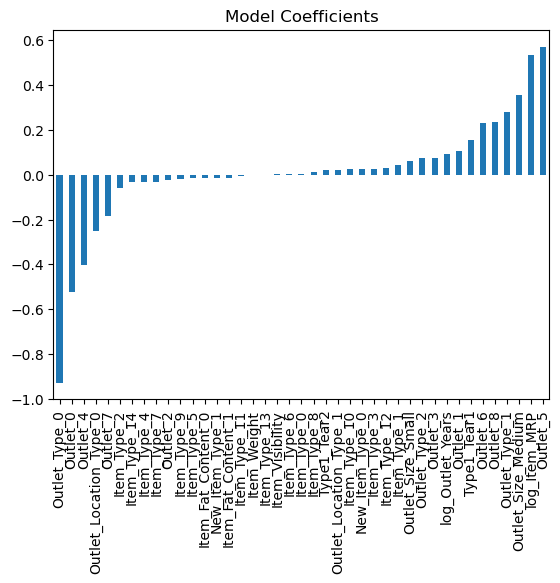

In [159]:
coef = pd.Series(best_estimator.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
coef

<AxesSubplot:title={'center':'Feature Importance'}>

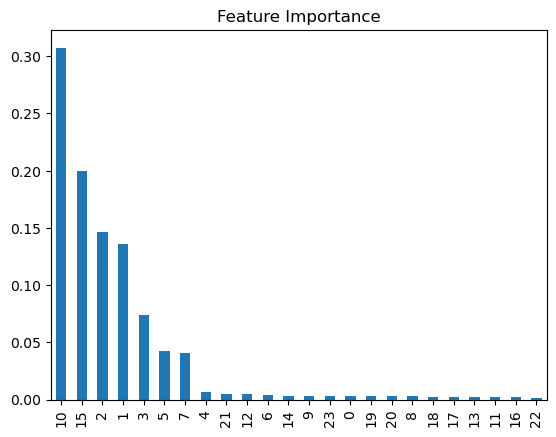

In [177]:
coef = pd.Series(best_estimator.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.2675244202306831
RMSE: 0.5172276290287315
Model Report
MSE: 1218417.497248366
RMSE: 1103.8195039264192


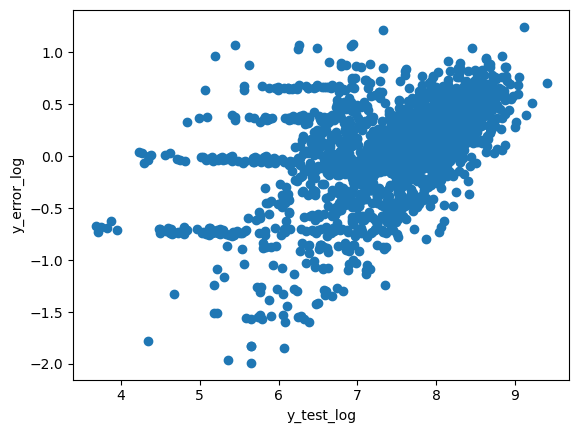

<AxesSubplot:title={'center':'Model Coefficients'}, xlabel='y_test', ylabel='y_error'>

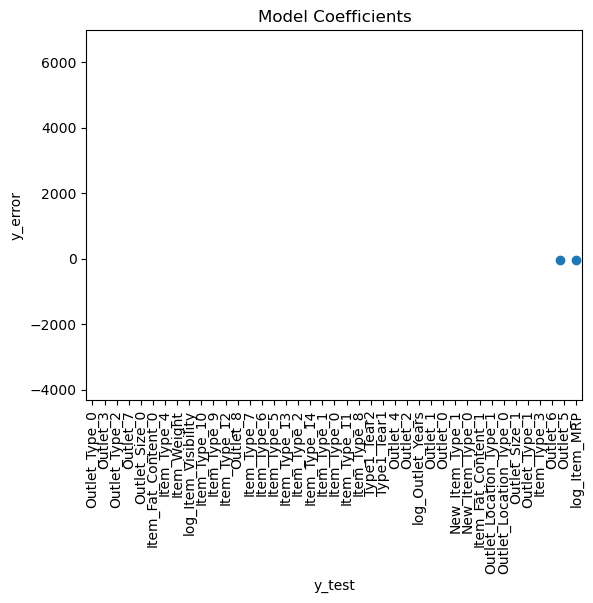

In [149]:
model = Lasso(alpha= 0.0019086182609773256, copy_X= True, fit_intercept= True, max_iter= 506, normalize= False, positive= False, precompute= False, random_state= 16, selection= 'random', tol= 8.844738143998077e-05, warm_start= False)
train2(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.281837557327425
RMSE: 0.5308837512369586


<AxesSubplot:title={'center':'Feature Importance'}>

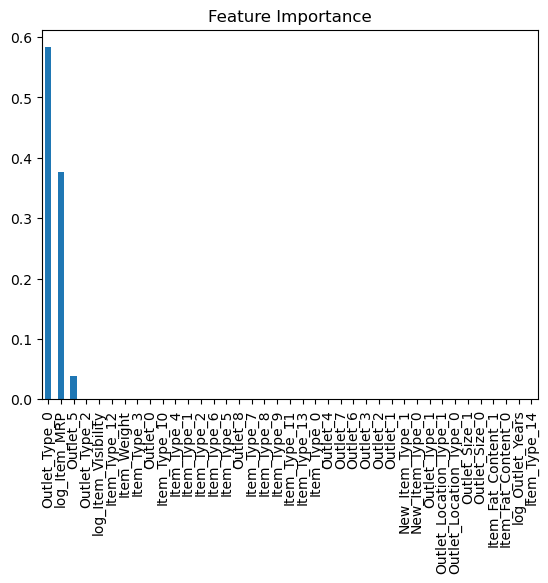

In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5, max_features=35)
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
    'bootstrap':[True],
    'max_depth':[5],
    'max_features':[35],
    'n_estimators':[200]

In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=200)
train(model, X, y)
# coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
# coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.27473459010120826
RMSE: 0.5241513045879103


In [21]:
max_depths = []
for i in range(100):
  max_depth = model.estimators_[i].tree_.max_depth
  max_depths.append(max_depth)

print('Average : ', np.mean(max_depths))
print('Max : ', max(max_depths))

Average :  35.59
Max :  44


Model Report
MSE: 0.2760315326609721
RMSE: 0.5253870313026122


<AxesSubplot:title={'center':'Feature Importance'}>

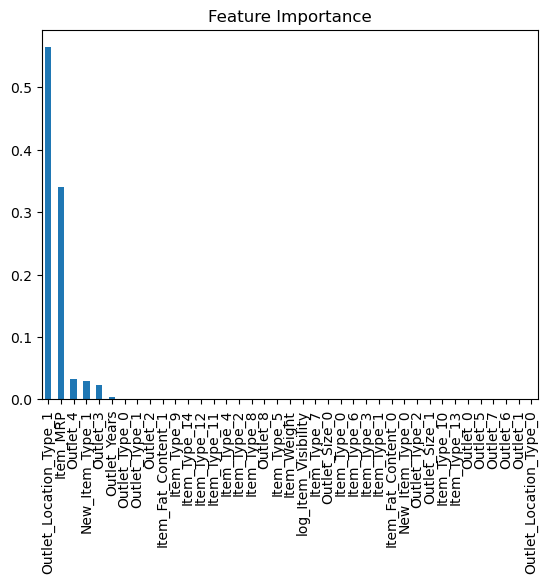

In [100]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=200)
train(model, X, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
    'C':[0.0001, 0.01, 0.1, 1, 10],
    'epsilon':[0.0001, 0.01, 0.1, 1, 10],

Model Report
MSE: 0.2682961722007525
RMSE: 0.5179731384934478
Model Report
MSE: 1208372.4065411084
RMSE: 1099.2599358391574


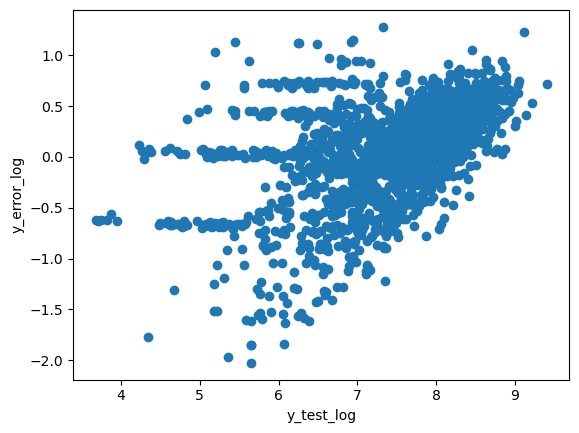

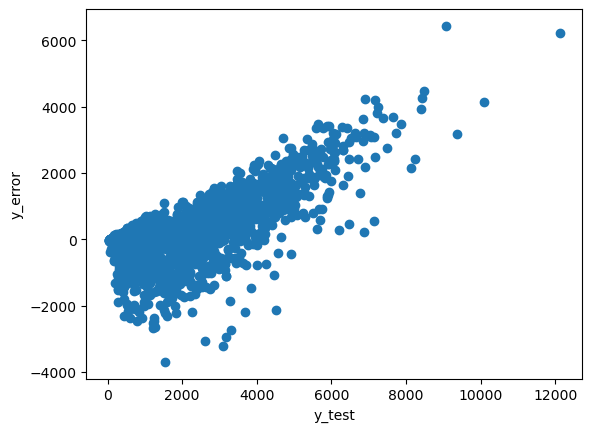

In [148]:
from sklearn.svm import SVR
model = SVR(C= 0.028695520118256056, cache_size= 600, coef0= -0.27035228408463335, degree= 3, epsilon= 0.431332331487461, gamma= 1, kernel= 'linear', max_iter= 3450, shrinking= True, tol= 0.0010819927640938797, verbose= False)
train2(model, X_norm, y)

In [93]:
X_norm.shape

(8523, 41)

In [101]:
print(np.expm1(2.5))
print(np.expm1(2.4))
print(f'0.1 -> {np.expm1(2.5)-np.expm1(2.4)}')

print(np.expm1(1.3))
print(np.expm1(1.1))
print(f'0.2 -> {np.expm1(1.3)-np.expm1(1.1)}')



11.182493960703473
10.023176380641601
0.1 -> 1.159317580061872
2.6692966676192444
2.0041660239464334
0.2 -> 0.665130643672811


# optuna

In [96]:
y=y_

In [97]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [102]:
def objective(trial):
    # Define the hyperparameters to be optimized
    C = trial.suggest_loguniform('C', 1e-5, 100)
    cache_size = trial.suggest_categorical('cache_size', [200, 400, 600])
    coef0 = trial.suggest_uniform('coef0', -1, 1)
    degree = trial.suggest_int('degree', 2, 5)
    epsilon = trial.suggest_loguniform('epsilon', 1e-5, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'] + [10**exp for exp in range(-5, 4)])
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    max_iter = trial.suggest_int('max_iter', -1, 5000)
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    verbose = trial.suggest_categorical('verbose', [False, True])

    # Initialize the SVR model with the chosen hyperparameters
    model = SVR(C=C, cache_size=cache_size, coef0=coef0, degree=degree, epsilon=epsilon,
                gamma=gamma, kernel=kernel, max_iter=max_iter, shrinking=shrinking, tol=tol, verbose=verbose)

    model.fit(X_norm, y)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X_norm, y, scoring='neg_mean_squared_error', cv=5)
    
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

    return rmse

# Define the Optuna study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and corresponding objective value
print('Best hyperparameters: ', study.best_params)
print('Best objective value: ', study.best_value)


[I 2023-03-29 13:11:48,598] A new study created in memory with name: no-name-5fecd458-5dba-46d3-b370-c4b72b4fea3c


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -53995.234792, rho = -3675.298387
nSV = 178, nBSV = 178
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -53592.760445, rho = -3533.497400
nSV = 180, nBSV = 180
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -52313.816750, rho = -3582.088057
nSV = 178, nBSV = 178
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -54290.611577, rho = -3592.753460
nSV = 180, nBSV = 180
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -50373.584028, rho = -3592.048352
nSV = 176, nBSV = 176
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 90
obj = -50724.122839, rho = -3549.125940
nSV = 178, nBSV = 178


[I 2023-03-29 13:11:49,281] Trial 0 finished with value: 2200.179288622605 and parameters: {'C': 0.1064410178809265, 'cache_size': 600, 'coef0': 0.6985145771927996, 'degree': 4, 'epsilon': 2.598041906093003, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 90, 'shrinking': True, 'tol': 0.00029340725604014425, 'verbose': True}. Best is trial 0 with value: 2200.179288622605.


Model Report
MSE: 4840788.902083872
RMSE: 2200.179288622605
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1632.201367, rho = -1147.356263
nSV = 6806, nBSV = 6806
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1468.339936, rho = -1547.652115
nSV = 6570, nBSV = 6570
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1479.199663, rho = -1516.692415
nSV = 6538, nBSV = 6538
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1483.668648, rho = -1447.449207
nSV = 6514, nBSV = 6514
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1476.551058, rho = -1574.617005
nSV = 6562, nBSV = 6562
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3872
obj = -1471.230888, rho = -1473.748315
nSV = 6522, nBSV = 6522


[I 2023-03-29 13:12:03,907] Trial 1 finished with value: 1833.469495511014 and parameters: {'C': 0.00016593584309379498, 'cache_size': 600, 'coef0': -0.8114524834440524, 'degree': 3, 'epsilon': 0.18285334237555176, 'gamma': 1e-05, 'kernel': 'poly', 'max_iter': 3872, 'shrinking': False, 'tol': 1.5958094152333332e-05, 'verbose': True}. Best is trial 1 with value: 1833.469495511014.


Model Report
MSE: 3361610.390969412
RMSE: 1833.469495511014


[I 2023-03-29 13:12:09,836] Trial 2 finished with value: 1798.728967645304 and parameters: {'C': 6.0548878589362284e-05, 'cache_size': 600, 'coef0': -0.10680773907312724, 'degree': 5, 'epsilon': 0.06161642191564281, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1705, 'shrinking': True, 'tol': 0.00013799912570992782, 'verbose': False}. Best is trial 2 with value: 1798.728967645304.


Model Report
MSE: 3235425.899046341
RMSE: 1798.728967645304
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -11321764.042301, rho = -2626.248100
nSV = 1260, nBSV = 1260
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -10638938.840081, rho = -2460.796800
nSV = 1260, nBSV = 1260
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -10793649.960502, rho = -2506.737000
nSV = 1260, nBSV = 1260
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -10831310.665718, rho = -2505.405400
nSV = 1260, nBSV = 1260
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -10755818.454446, rho = -2500.744800
nSV = 1260, nBSV = 1260
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 630
obj = -10737422.086186, rho = -2495.751300
nSV = 1260, nBSV = 1260


[I 2023-03-29 13:12:13,316] Trial 3 finished with value: 1735.0485206121207 and parameters: {'C': 2.961709284746809, 'cache_size': 400, 'coef0': -0.025056176258121843, 'degree': 3, 'epsilon': 0.002356297315089699, 'gamma': 100, 'kernel': 'rbf', 'max_iter': 630, 'shrinking': True, 'tol': 0.003992571056558039, 'verbose': True}. Best is trial 3 with value: 1735.0485206121207.


Model Report
MSE: 3010393.3688783087
RMSE: 1735.0485206121207
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -34462.982311, rho = -1174.649547
nSV = 6658, nBSV = 6658
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -31063.440669, rho = -1003.201186
nSV = 6300, nBSV = 6300
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -31385.631541, rho = -1007.092369
nSV = 6284, nBSV = 6284
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -31373.828104, rho = -1000.002834
nSV = 6260, nBSV = 6260
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -31332.228562, rho = -1001.839005
nSV = 6308, nBSV = 6308
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4143
obj = -31303.488980, rho = -1001.682103
nSV = 6306, nBSV = 6306


[I 2023-03-29 13:12:36,638] Trial 4 finished with value: 2071.877023604408 and parameters: {'C': 0.003759932498584702, 'cache_size': 200, 'coef0': -0.9406371868572627, 'degree': 2, 'epsilon': 4.3521132304073424e-05, 'gamma': 1, 'kernel': 'sigmoid', 'max_iter': 4143, 'shrinking': True, 'tol': 0.00012630339494624785, 'verbose': True}. Best is trial 3 with value: 1735.0485206121207.


Model Report
MSE: 4292674.400939859
RMSE: 2071.877023604408
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4835
obj = -705480.477726, rho = -1388.525048
nSV = 8124, nBSV = 8124
[LibSVM]....
*
optimization finished, #iter = 4070
obj = -565562.204645, rho = -1794.318541
nSV = 6812, nBSV = 6812
[LibSVM]....
*
optimization finished, #iter = 4090
obj = -570468.290686, rho = -1800.465074
nSV = 6816, nBSV = 6816
[LibSVM]....
*
optimization finished, #iter = 4103
obj = -572901.356962, rho = -1768.013912
nSV = 6818, nBSV = 6818
[LibSVM]....
*
optimization finished, #iter = 4076
obj = -568843.617768, rho = -1807.797765
nSV = 6818, nBSV = 6818
[LibSVM]....
*
optimization finished, #iter = 4104
obj = -567935.642253, rho = -1794.162964
nSV = 6814, nBSV = 6814


[I 2023-03-29 13:12:58,299] Trial 5 finished with value: 1750.1544212001622 and parameters: {'C': 0.06362911530448442, 'cache_size': 600, 'coef0': -0.8082786887279734, 'degree': 2, 'epsilon': 0.15667910427523984, 'gamma': 0.0001, 'kernel': 'sigmoid', 'max_iter': 4835, 'shrinking': True, 'tol': 0.01329026574607109, 'verbose': True}. Best is trial 3 with value: 1735.0485206121207.


Model Report
MSE: 3063040.4980464745
RMSE: 1750.1544212001622


[I 2023-03-29 13:13:17,951] Trial 6 finished with value: 1986.043992578044 and parameters: {'C': 0.00015404487758222902, 'cache_size': 200, 'coef0': 0.37226178581402714, 'degree': 4, 'epsilon': 0.2674543471418676, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 3016, 'shrinking': False, 'tol': 0.04533771833181324, 'verbose': False}. Best is trial 3 with value: 1735.0485206121207.


Model Report
MSE: 3944370.740455338
RMSE: 1986.043992578044
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -41417656.376634, rho = -2201.426769
nSV = 1990, nBSV = 1990
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -39530422.873319, rho = -2009.526271
nSV = 1984, nBSV = 1984
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -39821340.563129, rho = -2037.634684
nSV = 1978, nBSV = 1978
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -39620755.026095, rho = -2020.720445
nSV = 1974, nBSV = 1974
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -39610731.014404, rho = -2025.399450
nSV = 1972, nBSV = 1972
[LibSVM]

[I 2023-03-29 13:13:22,091] Trial 7 finished with value: 1705.7808818453875 and parameters: {'C': 10.765122454399068, 'cache_size': 600, 'coef0': -0.9625155115459143, 'degree': 3, 'epsilon': 6.784481631037577, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1026, 'shrinking': False, 'tol': 0.002439126178087901, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1026
obj = -39806958.267839, rho = -2012.262689
nSV = 1990, nBSV = 1990
Model Report
MSE: 2909688.416869228
RMSE: 1705.7808818453875


[I 2023-03-29 13:13:23,774] Trial 8 finished with value: 1911.6900351441923 and parameters: {'C': 1.0392764566229469, 'cache_size': 600, 'coef0': -0.7721104147039126, 'degree': 4, 'epsilon': 5.002871887290276, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 233, 'shrinking': True, 'tol': 0.00046467276973863564, 'verbose': False}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 3654558.790469603
RMSE: 1911.6900351441923
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2627.389289, rho = -2960.999716
nSV = 642, nBSV = 642
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2568.264117, rho = -2789.899149
nSV = 642, nBSV = 642
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2547.363076, rho = -2821.152213
nSV = 638, nBSV = 638
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2597.114155, rho = -2857.418646
nSV = 644, nBSV = 644
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2529.153806, rho = -2821.463653
nSV = 638, nBSV = 638
[LibSVM]

[I 2023-03-29 13:13:24,960] Trial 9 finished with value: 1823.4323661212566 and parameters: {'C': 0.001751627094065609, 'cache_size': 600, 'coef0': 0.38257754488920503, 'degree': 4, 'epsilon': 0.055832920858075674, 'gamma': 10, 'kernel': 'linear', 'max_iter': 323, 'shrinking': True, 'tol': 0.05722855762572966, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 323
obj = -2568.589092, rho = -2829.118332
nSV = 642, nBSV = 642
Model Report
MSE: 3324905.5938185644
RMSE: 1823.4323661212566


[I 2023-03-29 13:13:32,177] Trial 10 finished with value: 1792.0673075831762 and parameters: {'C': 83.23429166955977, 'cache_size': 400, 'coef0': -0.4382239517492622, 'degree': 5, 'epsilon': 5.927509970317346, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1762, 'shrinking': False, 'tol': 0.0026858479778704065, 'verbose': False}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 3211505.234908414
RMSE: 1792.0673075831762
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -832.807781, rho = 6881.381393
nSV = 780, nBSV = 0
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -997.594147, rho = 5022.035639
nSV = 747, nBSV = 0
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -794.175118, rho = 3242.588576
nSV = 574, nBSV = 0
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -905.370949, rho = 3145.421381
nSV = 699, nBSV = 0
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -646.066329, rho = 8540.437187
nSV = 818, nBSV = 0
[LibSVM]

[I 2023-03-29 13:13:34,091] Trial 11 finished with value: 5236.23018981242 and parameters: {'C': 7.186072369735725, 'cache_size': 400, 'coef0': -0.24730537002472575, 'degree': 3, 'epsilon': 0.002254477347500925, 'gamma': 100, 'kernel': 'poly', 'max_iter': 1312, 'shrinking': False, 'tol': 0.0037354169361063653, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1312
obj = -740.946090, rho = 1907.763439
nSV = 820, nBSV = 0
Model Report
MSE: 27418106.600703012
RMSE: 5236.23018981242
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1133
obj = -10420645.375526, rho = -2135.014093
nSV = 2172, nBSV = 2172
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1133
obj = -9958518.406465, rho = -1948.240286
nSV = 2164, nBSV = 2164
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1133
obj = -9988683.272718, rho = -1977.075907
nSV = 2148, nBSV = 2148
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1133
obj = -10034933.435309, rho = -1966.194121
nSV = 2146, nBSV = 2146
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1133
obj = -9978608.489038, rho = -1955.083521
nSV = 2148, nBSV = 2148
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished

[I 2023-03-29 13:13:39,035] Trial 12 finished with value: 1712.3752184652335 and parameters: {'C': 2.590454196403671, 'cache_size': 400, 'coef0': -0.4478052596047263, 'degree': 3, 'epsilon': 0.0019653571691367984, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 1133, 'shrinking': False, 'tol': 0.0020007460733651996, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 2932228.888813856
RMSE: 1712.3752184652335
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -957391569.388334, rho = -3883.832763
nSV = 5556, nBSV = 5556
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -759703580.247027, rho = -3641.532433
nSV = 5556, nBSV = 5556
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -736077919.857083, rho = -3429.194806
nSV = 5556, nBSV = 5556
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -768533462.824962, rho = -3588.189701
nSV = 5556, nBSV = 5556
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -761069944.859454, rho = -3653.882541
nSV = 5556, nBSV = 5556
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2778
obj = -734101120.070426, rho = -3514.272070
nSV = 5556, nBSV = 5556


[I 2023-03-29 13:13:50,868] Trial 13 finished with value: 6564.818244434583 and parameters: {'C': 36.60844806594036, 'cache_size': 400, 'coef0': -0.5223998661804938, 'degree': 2, 'epsilon': 0.00570409758489105, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 2778, 'shrinking': False, 'tol': 0.0010062339199870584, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 43096838.58246116
RMSE: 6564.818244434583
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1723847.996666, rho = -2206.896050
nSV = 1932, nBSV = 1932
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1642256.075043, rho = -2022.830718
nSV = 1926, nBSV = 1926
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1660338.861253, rho = -2048.818843
nSV = 1924, nBSV = 1924
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1647904.637062, rho = -2031.469619
nSV = 1920, nBSV = 1920
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1648265.333455, rho = -2038.168057
nSV = 1916, nBSV = 1916
[LibSVM]

[I 2023-03-29 13:13:54,899] Trial 14 finished with value: 1712.842684853898 and parameters: {'C': 0.45773272415605387, 'cache_size': 400, 'coef0': -0.5176491216485097, 'degree': 3, 'epsilon': 0.0003715857507342254, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 994, 'shrinking': False, 'tol': 0.009640242301961796, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 994
obj = -1656390.906900, rho = -2024.889400
nSV = 1936, nBSV = 1936
Model Report
MSE: 2933830.0630575093
RMSE: 1712.842684853898
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.334984, rho = 8548.436206
nSV = 1093, nBSV = 0
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.518170, rho = 5447.763533
nSV = 923, nBSV = 0
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.294251, rho = 8244.135834
nSV = 701, nBSV = 0
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.297535, rho = 3834.490839
nSV = 980, nBSV = 0
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.318696, rho = 4419.796272
nSV = 676, nBSV = 0
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2012
obj = -1.098804, rho = 5653

[I 2023-03-29 13:13:57,417] Trial 15 finished with value: 5728.165799606713 and parameters: {'C': 9.693887568737399, 'cache_size': 200, 'coef0': -0.9711233171174938, 'degree': 3, 'epsilon': 0.020229145841746076, 'gamma': 1000, 'kernel': 'poly', 'max_iter': 2012, 'shrinking': False, 'tol': 0.0012469981147318844, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 32811883.427784014
RMSE: 5728.165799606713
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -3031286.683164, rho = -1404.097567
nSV = 4470, nBSV = 4470
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -2673160.774601, rho = -1213.039018
nSV = 4470, nBSV = 4470
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -2700061.851060, rho = -1216.825149
nSV = 4470, nBSV = 4470
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -2708567.225331, rho = -1216.278942
nSV = 4470, nBSV = 4470
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -2692443.885820, rho = -1205.673222
nSV = 4470, nBSV = 4470
[LibSVM]..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 2235
obj = -2684588.673954, rho = -1246.055641
nSV = 4470, nBSV = 4470


[I 2023-03-29 13:14:06,802] Trial 16 finished with value: 2020.132157114902 and parameters: {'C': 0.32864951070785603, 'cache_size': 400, 'coef0': -0.6104947273762742, 'degree': 2, 'epsilon': 0.7045980373734314, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 2235, 'shrinking': False, 'tol': 0.015252997970741037, 'verbose': True}. Best is trial 7 with value: 1705.7808818453875.


Model Report
MSE: 4080933.932209707
RMSE: 2020.132157114902
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -10437968.452037, rho = -2188.280759
nSV = 2048, nBSV = 2048
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -9937678.185760, rho = -2006.009624
nSV = 2050, nBSV = 2050
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -9967919.701903, rho = -2023.686415
nSV = 2042, nBSV = 2042
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -9951123.651416, rho = -2012.660839
nSV = 2044, nBSV = 2044
[LibSVM].WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -9905938.010572, rho = -2004.489406
nSV = 2046, nBSV = 2046
[LibSVM]

[I 2023-03-29 13:14:11,101] Trial 17 finished with value: 1696.5200314331353 and parameters: {'C': 2.4378548261108013, 'cache_size': 600, 'coef0': -0.31690801976266336, 'degree': 3, 'epsilon': 1.4441066830481872, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 1047, 'shrinking': False, 'tol': 0.09765728726260986, 'verbose': True}. Best is trial 17 with value: 1696.5200314331353.


.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1047
obj = -9875215.073981, rho = -1998.719729
nSV = 2056, nBSV = 2056
Model Report
MSE: 2878180.217053886
RMSE: 1696.5200314331353


[I 2023-03-29 13:14:29,498] Trial 18 finished with value: 1298.300405456121 and parameters: {'C': 24.642971977685058, 'cache_size': 600, 'coef0': -0.19759268022058663, 'degree': 4, 'epsilon': 9.397760714974746, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3222, 'shrinking': False, 'tol': 0.09370973135798419, 'verbose': False}. Best is trial 18 with value: 1298.300405456121.


Model Report
MSE: 1685583.9428075287
RMSE: 1298.300405456121


[I 2023-03-29 13:14:48,843] Trial 19 finished with value: 1428.8074720494967 and parameters: {'C': 91.81588966734998, 'cache_size': 600, 'coef0': -0.256882296426883, 'degree': 5, 'epsilon': 1.1577651175796608, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3314, 'shrinking': False, 'tol': 0.09554684835784487, 'verbose': False}. Best is trial 18 with value: 1298.300405456121.


Model Report
MSE: 2041490.7921844735
RMSE: 1428.8074720494967


[I 2023-03-29 13:15:08,047] Trial 20 finished with value: 1609.2642692911122 and parameters: {'C': 39.26491624997869, 'cache_size': 600, 'coef0': 0.15496948218459927, 'degree': 5, 'epsilon': 0.9209444421995368, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3434, 'shrinking': False, 'tol': 0.03723564651302785, 'verbose': False}. Best is trial 18 with value: 1298.300405456121.


Model Report
MSE: 2589731.4884170573
RMSE: 1609.2642692911122


[I 2023-03-29 13:15:25,769] Trial 21 finished with value: 2689.5017919256748 and parameters: {'C': 90.40913727641241, 'cache_size': 600, 'coef0': 0.08780225173951456, 'degree': 5, 'epsilon': 1.2116097593826414, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3283, 'shrinking': False, 'tol': 0.032473835485941405, 'verbose': False}. Best is trial 18 with value: 1298.300405456121.


Model Report
MSE: 7233419.888771415
RMSE: 2689.5017919256748


[I 2023-03-29 13:15:46,110] Trial 22 finished with value: 1572.0487670490024 and parameters: {'C': 39.021212847274406, 'cache_size': 600, 'coef0': 0.11568881035551404, 'degree': 5, 'epsilon': 9.936503650689309, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3608, 'shrinking': False, 'tol': 0.0633967349134565, 'verbose': False}. Best is trial 18 with value: 1298.300405456121.


Model Report
MSE: 2471337.3259802884
RMSE: 1572.0487670490024


[I 2023-03-29 13:16:07,399] Trial 23 finished with value: 1257.5039544236608 and parameters: {'C': 20.526418743813085, 'cache_size': 600, 'coef0': -0.1528173399035876, 'degree': 5, 'epsilon': 9.629675570446018, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 3980, 'shrinking': False, 'tol': 0.08007848187581991, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 1581316.1953911444
RMSE: 1257.5039544236608


[I 2023-03-29 13:16:29,196] Trial 24 finished with value: 1261.5404828654696 and parameters: {'C': 16.230653867378862, 'cache_size': 600, 'coef0': -0.1820068806983801, 'degree': 5, 'epsilon': 2.7625889731839877, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4430, 'shrinking': False, 'tol': 0.08050978998453992, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 1591484.3899084423
RMSE: 1261.5404828654696


[I 2023-03-29 13:16:51,587] Trial 25 finished with value: 1277.7116996857467 and parameters: {'C': 13.660877067273166, 'cache_size': 600, 'coef0': -0.12775591064706757, 'degree': 4, 'epsilon': 2.9144857884978808, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4644, 'shrinking': False, 'tol': 0.022077465974751583, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 1632547.1875138395
RMSE: 1277.7116996857467


[I 2023-03-29 13:17:13,648] Trial 26 finished with value: 1305.1733556842269 and parameters: {'C': 9.79135858263328, 'cache_size': 200, 'coef0': -0.08454410494047128, 'degree': 5, 'epsilon': 2.676038838230965, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4782, 'shrinking': False, 'tol': 0.023300816135523403, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 1703477.4883880254
RMSE: 1305.1733556842269


[I 2023-03-29 13:17:35,603] Trial 27 finished with value: 1750.1582294952148 and parameters: {'C': 0.3377221862469954, 'cache_size': 600, 'coef0': -0.34674180054353365, 'degree': 4, 'epsilon': 0.43276135818838074, 'gamma': 1e-05, 'kernel': 'sigmoid', 'max_iter': 4456, 'shrinking': False, 'tol': 0.02033922400654223, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 3063053.828269825
RMSE: 1750.1582294952148


[I 2023-03-29 13:17:57,658] Trial 28 finished with value: 1580.7166609615244 and parameters: {'C': 0.9510739321071884, 'cache_size': 600, 'coef0': -0.1672594321463506, 'degree': 5, 'epsilon': 2.695444290160436, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 4323, 'shrinking': False, 'tol': 0.00770953144286665, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 2498665.162241351
RMSE: 1580.7166609615244


[I 2023-03-29 13:18:10,897] Trial 29 finished with value: 1516.521777486593 and parameters: {'C': 0.15897003811043442, 'cache_size': 600, 'coef0': -0.010516879931229059, 'degree': 4, 'epsilon': 2.3857163014724194, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 3882, 'shrinking': False, 'tol': 0.026268413826233614, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 2299838.3015910955
RMSE: 1516.521777486593


[I 2023-03-29 13:18:26,831] Trial 30 finished with value: 3277.9283578671043 and parameters: {'C': 4.521886675200755, 'cache_size': 600, 'coef0': 0.8891088024453218, 'degree': 5, 'epsilon': 0.34186982377468667, 'gamma': 1000, 'kernel': 'sigmoid', 'max_iter': 4999, 'shrinking': False, 'tol': 0.007504684447721014, 'verbose': False}. Best is trial 23 with value: 1257.5039544236608.


Model Report
MSE: 10744814.319309331
RMSE: 3277.9283578671043


[I 2023-03-29 13:18:49,112] Trial 31 finished with value: 1254.1597574208206 and parameters: {'C': 18.702874353457933, 'cache_size': 600, 'coef0': -0.19471101865531956, 'degree': 4, 'epsilon': 8.775382955901327, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4540, 'shrinking': False, 'tol': 0.05936720405549377, 'verbose': False}. Best is trial 31 with value: 1254.1597574208206.


Model Report
MSE: 1572916.6971338517
RMSE: 1254.1597574208206


[I 2023-03-29 13:19:11,047] Trial 32 finished with value: 1259.3263073786106 and parameters: {'C': 17.407348038075128, 'cache_size': 600, 'coef0': -0.17679035401720977, 'degree': 4, 'epsilon': 2.54121412048286, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4521, 'shrinking': False, 'tol': 0.048928753779804636, 'verbose': False}. Best is trial 31 with value: 1254.1597574208206.


Model Report
MSE: 1585902.7484558467
RMSE: 1259.3263073786106


[I 2023-03-29 13:19:32,538] Trial 33 finished with value: 1237.5308557996057 and parameters: {'C': 20.623198618920163, 'cache_size': 600, 'coef0': -0.33657554273569396, 'degree': 4, 'epsilon': 4.237150550694793, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': 4029, 'shrinking': False, 'tol': 0.05187361115729423, 'verbose': False}. Best is trial 33 with value: 1237.5308557996057.


Model Report
MSE: 1531482.6190561044
RMSE: 1237.5308557996057


[I 2023-03-29 13:19:54,187] Trial 34 finished with value: 1680.7522671098561 and parameters: {'C': 4.72589078747187, 'cache_size': 600, 'coef0': -0.3015879037189477, 'degree': 4, 'epsilon': 4.164149930907411, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 3947, 'shrinking': False, 'tol': 0.04413207050618336, 'verbose': False}. Best is trial 33 with value: 1237.5308557996057.


Model Report
MSE: 2824928.183394921
RMSE: 1680.7522671098561


[I 2023-03-29 13:20:17,667] Trial 35 finished with value: 1676.8989844181904 and parameters: {'C': 1.9700413684584328, 'cache_size': 600, 'coef0': 0.0018936962214502473, 'degree': 4, 'epsilon': 0.5955618553337064, 'gamma': 10, 'kernel': 'sigmoid', 'max_iter': 4109, 'shrinking': True, 'tol': 0.03759063055014203, 'verbose': False}. Best is trial 33 with value: 1237.5308557996057.


Model Report
MSE: 2811990.203942758
RMSE: 1676.8989844181904


[I 2023-03-29 13:20:30,442] Trial 36 finished with value: 1190.4336018714991 and parameters: {'C': 21.44149781495626, 'cache_size': 200, 'coef0': -0.3602917557375768, 'degree': 4, 'epsilon': 6.943513130632694, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 3562, 'shrinking': False, 'tol': 0.050758643588822545, 'verbose': False}. Best is trial 36 with value: 1190.4336018714991.


Model Report
MSE: 1417132.160464751
RMSE: 1190.4336018714991


[I 2023-03-29 13:20:43,271] Trial 37 finished with value: 1204.003060259258 and parameters: {'C': 5.156809889398411, 'cache_size': 200, 'coef0': -0.39999834297638404, 'degree': 4, 'epsilon': 7.814188130136629, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3673, 'shrinking': True, 'tol': 0.016624989403204803, 'verbose': False}. Best is trial 36 with value: 1190.4336018714991.


Model Report
MSE: 1449623.3691136586
RMSE: 1204.003060259258


[I 2023-03-29 13:20:52,358] Trial 38 finished with value: 1293.1930237198346 and parameters: {'C': 5.839086293990998, 'cache_size': 200, 'coef0': -0.6379798636325684, 'degree': 4, 'epsilon': 0.11438887271924875, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 2606, 'shrinking': True, 'tol': 0.013430759890436569, 'verbose': False}. Best is trial 36 with value: 1190.4336018714991.


Model Report
MSE: 1672348.1965976488
RMSE: 1293.1930237198346


[I 2023-03-29 13:21:04,224] Trial 39 finished with value: 1316.4352773040391 and parameters: {'C': 0.9191638944419009, 'cache_size': 200, 'coef0': -0.3679605814141572, 'degree': 4, 'epsilon': 1.2734170561368492, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3527, 'shrinking': True, 'tol': 0.006303884187548766, 'verbose': False}. Best is trial 36 with value: 1190.4336018714991.


Model Report
MSE: 1733001.8393305622
RMSE: 1316.4352773040391


[I 2023-03-29 13:21:16,696] Trial 40 finished with value: 1187.549571148646 and parameters: {'C': 43.56558712658474, 'cache_size': 200, 'coef0': -0.7013266137095129, 'degree': 4, 'epsilon': 4.882961856663645, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3695, 'shrinking': True, 'tol': 0.016780963837012927, 'verbose': False}. Best is trial 40 with value: 1187.549571148646.


Model Report
MSE: 1410273.983935333
RMSE: 1187.549571148646


[I 2023-03-29 13:21:29,095] Trial 41 finished with value: 1189.4622036268895 and parameters: {'C': 43.686000501981844, 'cache_size': 200, 'coef0': -0.6953234412184117, 'degree': 4, 'epsilon': 6.22825171368791, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3697, 'shrinking': True, 'tol': 0.016923308409141566, 'verbose': False}. Best is trial 40 with value: 1187.549571148646.


Model Report
MSE: 1414820.333856936
RMSE: 1189.4622036268895


[I 2023-03-29 13:21:41,898] Trial 42 finished with value: 1189.2960225030592 and parameters: {'C': 45.6238795817034, 'cache_size': 200, 'coef0': -0.7341643391908335, 'degree': 4, 'epsilon': 5.020011421440076, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3705, 'shrinking': True, 'tol': 0.012266814573553766, 'verbose': False}. Best is trial 40 with value: 1187.549571148646.


Model Report
MSE: 1414425.029141597
RMSE: 1189.2960225030592


[I 2023-03-29 13:21:54,399] Trial 43 finished with value: 1187.299465357797 and parameters: {'C': 43.964915197756724, 'cache_size': 200, 'coef0': -0.7468528103376405, 'degree': 4, 'epsilon': 4.872021894225927, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3734, 'shrinking': True, 'tol': 0.014571004483662256, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1409680.0204389107
RMSE: 1187.299465357797


[I 2023-03-29 13:22:04,947] Trial 44 finished with value: 1248.965494514594 and parameters: {'C': 60.54926863680539, 'cache_size': 200, 'coef0': -0.8688788371019192, 'degree': 4, 'epsilon': 0.22336058157202096, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 2972, 'shrinking': True, 'tol': 0.011659100511373303, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1559914.8064880844
RMSE: 1248.965494514594


[I 2023-03-29 13:38:09,501] Trial 45 finished with value: 1231.0455328431672 and parameters: {'C': 44.043197464054366, 'cache_size': 200, 'coef0': -0.7337268032166814, 'degree': 4, 'epsilon': 0.5704497186453019, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3035, 'shrinking': True, 'tol': 0.00658624388020035, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1515473.1039331171
RMSE: 1231.0455328431672


[I 2023-03-29 13:41:39,217] Trial 46 finished with value: 1188.280497555761 and parameters: {'C': 55.71012575707113, 'cache_size': 200, 'coef0': -0.8600863683645871, 'degree': 3, 'epsilon': 5.084731280219318, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3689, 'shrinking': True, 'tol': 0.02784402960266966, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1412010.540871367
RMSE: 1188.280497555761


[I 2023-03-29 13:41:52,321] Trial 47 finished with value: 1193.141764489498 and parameters: {'C': 98.05293306003949, 'cache_size': 200, 'coef0': -0.8499033391797739, 'degree': 3, 'epsilon': 1.6897383998370321, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 3749, 'shrinking': True, 'tol': 0.0048824307037295695, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1423587.2701691126
RMSE: 1193.141764489498


[I 2023-03-29 13:42:00,842] Trial 48 finished with value: 1272.3036779127988 and parameters: {'C': 48.188657176178765, 'cache_size': 200, 'coef0': -0.7521844674944724, 'degree': 3, 'epsilon': 4.321121211606732, 'gamma': 1e-05, 'kernel': 'linear', 'max_iter': 2380, 'shrinking': True, 'tol': 0.012693164203231815, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 1618756.648830435
RMSE: 1272.3036779127988


[I 2023-03-29 13:42:19,034] Trial 49 finished with value: 1963.8082551745572 and parameters: {'C': 8.965132006910402, 'cache_size': 200, 'coef0': -0.9174869850559475, 'degree': 3, 'epsilon': 0.8857802089460411, 'gamma': 1e-05, 'kernel': 'rbf', 'max_iter': 2870, 'shrinking': True, 'tol': 0.00989090698728031, 'verbose': False}. Best is trial 43 with value: 1187.299465357797.


Model Report
MSE: 3856542.8630917384
RMSE: 1963.8082551745572


[I 2023-03-29 13:42:32,002] Trial 50 finished with value: 1185.8808133229911 and parameters: {'C': 34.380006091825564, 'cache_size': 200, 'coef0': -0.6488328468047799, 'degree': 2, 'epsilon': 5.115326184599182, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4248, 'shrinking': True, 'tol': 0.00407275323482775, 'verbose': False}. Best is trial 50 with value: 1185.8808133229911.


Model Report
MSE: 1406313.3034075988
RMSE: 1185.8808133229911


[I 2023-03-29 13:42:44,875] Trial 51 finished with value: 1185.6273900495505 and parameters: {'C': 34.3355324825227, 'cache_size': 200, 'coef0': -0.6834775686600043, 'degree': 2, 'epsilon': 4.781008088586101, 'gamma': 1, 'kernel': 'linear', 'max_iter': 4142, 'shrinking': True, 'tol': 0.01857245262356443, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1405712.308035709
RMSE: 1185.6273900495505


[I 2023-03-29 13:42:58,090] Trial 52 finished with value: 1187.080879896785 and parameters: {'C': 92.90034632671139, 'cache_size': 200, 'coef0': -0.7848988580272576, 'degree': 2, 'epsilon': 4.582750431393777, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4134, 'shrinking': True, 'tol': 0.004047032076904224, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1409161.0154165253
RMSE: 1187.080879896785


[I 2023-03-29 13:43:11,131] Trial 53 finished with value: 1186.8114900455305 and parameters: {'C': 77.1710621728821, 'cache_size': 200, 'coef0': -0.8108392947609633, 'degree': 2, 'epsilon': 1.8554741923166187, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4252, 'shrinking': True, 'tol': 0.00431950841851348, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408521.5129040922
RMSE: 1186.8114900455305


[I 2023-03-29 13:43:24,027] Trial 54 finished with value: 1186.721276904195 and parameters: {'C': 26.828929171340523, 'cache_size': 200, 'coef0': -0.5933055912203936, 'degree': 2, 'epsilon': 1.7781270825352988, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4205, 'shrinking': True, 'tol': 0.0036755516207613416, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408307.3890571233
RMSE: 1186.721276904195


[I 2023-03-29 13:43:36,972] Trial 55 finished with value: 1187.5709224511506 and parameters: {'C': 84.5801345249482, 'cache_size': 200, 'coef0': -0.9888276424884901, 'degree': 2, 'epsilon': 1.560504636207522, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4272, 'shrinking': True, 'tol': 0.004244891205937505, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1410324.695851477
RMSE: 1187.5709224511506


[I 2023-03-29 13:43:50,138] Trial 56 finished with value: 1193.9440984932269 and parameters: {'C': 9.883458889219554, 'cache_size': 200, 'coef0': -0.5798572440367463, 'degree': 2, 'epsilon': 0.40758378977842513, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4211, 'shrinking': True, 'tol': 0.0029153582100571863, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1425502.5103268041
RMSE: 1193.9440984932269
[LibSVM]....
*
optimization finished, #iter = 4433
obj = -316333567.479088, rho = -1793.047654
nSV = 8515, nBSV = 8406
[LibSVM]...
*
optimization finished, #iter = 3558
obj = -251451837.280595, rho = -1793.101508
nSV = 6812, nBSV = 6726
[LibSVM]...
*
optimization finished, #iter = 3573
obj = -253659510.086009, rho = -1803.250114
nSV = 6816, nBSV = 6721
[LibSVM]...
*
optimization finished, #iter = 3553
obj = -254750123.809796, rho = -1769.776081
nSV = 6815, nBSV = 6733
[LibSVM]...
*
optimization finished, #iter = 3564
obj = -252927426.925560, rho = -1805.776987
nSV = 6816, nBSV = 6722
[LibSVM]...
*
optimization finished, #iter = 3551
obj = -252518329.702933, rho = -1792.411495
nSV = 6817, nBSV = 6721


[I 2023-03-29 13:44:09,994] Trial 57 finished with value: 1750.0750152717214 and parameters: {'C': 28.63806968301761, 'cache_size': 200, 'coef0': -0.5097677406136369, 'degree': 2, 'epsilon': 1.7435109571070206, 'gamma': 100, 'kernel': 'rbf', 'max_iter': 4735, 'shrinking': True, 'tol': 0.0022545431118906, 'verbose': True}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 3062762.559078316
RMSE: 1750.0750152717214


[I 2023-03-29 13:44:22,839] Trial 58 finished with value: 1188.1605403204871 and parameters: {'C': 91.61580483993527, 'cache_size': 200, 'coef0': -0.8119813294548958, 'degree': 2, 'epsilon': 0.9258144083551276, 'gamma': 1, 'kernel': 'linear', 'max_iter': 4163, 'shrinking': True, 'tol': 0.0017986533107739963, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1411725.4695746717
RMSE: 1188.1605403204871


[I 2023-03-29 13:44:35,961] Trial 59 finished with value: 1186.481731261554 and parameters: {'C': 29.54065141315944, 'cache_size': 200, 'coef0': -0.7908962008647207, 'degree': 2, 'epsilon': 0.6440517536544834, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4959, 'shrinking': True, 'tol': 0.0042412374292544125, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1407738.8986174143
RMSE: 1186.481731261554
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4968
obj = -85889558.710440, rho = -1898.289235
nSV = 8515, nBSV = 8471
[LibSVM]....
*.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4968
obj = -66808114.000527, rho = -1906.922442
nSV = 6817, nBSV = 6794
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4968
obj = -68874266.832344, rho = -1881.186334
nSV = 6813, nBSV = 6790
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4968
obj = -68859324.646925, rho = -1891.376660
nSV = 6815, nBSV = 6792
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4968
obj = -68615613.836259, rho = -1892.617463
nSV = 6816, nBSV = 6793
[LibSVM]....
*
optimization finished, #iter = 4885
obj = -67353193.031892, rho = -1893.631276
nSV = 6816, nBSV = 6792


[I 2023-03-29 13:44:49,394] Trial 60 finished with value: 1192.1729431697504 and parameters: {'C': 11.509321128137735, 'cache_size': 200, 'coef0': -0.9162473258560746, 'degree': 2, 'epsilon': 0.6674733362047349, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4968, 'shrinking': True, 'tol': 0.002958230576454842, 'verbose': True}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1421276.326426025
RMSE: 1192.1729431697504


[I 2023-03-29 13:45:02,473] Trial 61 finished with value: 1186.705935335234 and parameters: {'C': 27.93158687695303, 'cache_size': 200, 'coef0': -0.6345052693945599, 'degree': 2, 'epsilon': 3.4206568376794744, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4657, 'shrinking': True, 'tol': 0.004938242312680859, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408270.9769598725
RMSE: 1186.705935335234


[I 2023-03-29 13:45:15,519] Trial 62 finished with value: 1186.6802865193586 and parameters: {'C': 27.99087005372569, 'cache_size': 200, 'coef0': -0.6484396280311834, 'degree': 2, 'epsilon': 1.7363657164398267, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4684, 'shrinking': True, 'tol': 0.0035118020900773692, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408210.1024136667
RMSE: 1186.6802865193586


[I 2023-03-29 13:45:28,560] Trial 63 finished with value: 1186.6943889816955 and parameters: {'C': 28.12101384918131, 'cache_size': 200, 'coef0': -0.6397541809802403, 'degree': 2, 'epsilon': 1.735539558062167, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4717, 'shrinking': True, 'tol': 0.00529507225724309, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408243.5728406399
RMSE: 1186.6943889816955


[I 2023-03-29 13:45:41,554] Trial 64 finished with value: 1186.9489722804674 and parameters: {'C': 26.24001210196034, 'cache_size': 400, 'coef0': -0.6426390146971239, 'degree': 2, 'epsilon': 1.135976549906301, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4707, 'shrinking': True, 'tol': 0.0016508510150864855, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408847.8627976575
RMSE: 1186.9489722804674


[I 2023-03-29 13:45:54,969] Trial 65 finished with value: 1191.170244569719 and parameters: {'C': 13.330783597119671, 'cache_size': 200, 'coef0': -0.48213490752529164, 'degree': 2, 'epsilon': 0.16510781097718316, 'gamma': 1, 'kernel': 'linear', 'max_iter': 4886, 'shrinking': True, 'tol': 0.0056088575019269645, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1418886.551548284
RMSE: 1191.170244569719


[I 2023-03-29 13:46:07,881] Trial 66 finished with value: 1196.1465574023198 and parameters: {'C': 8.14604960278601, 'cache_size': 200, 'coef0': -0.556348532751712, 'degree': 2, 'epsilon': 0.30372750091631434, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4406, 'shrinking': True, 'tol': 0.0030930218296704214, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1430766.586785421
RMSE: 1196.1465574023198


[I 2023-03-29 13:46:27,694] Trial 67 finished with value: 1750.2436245465083 and parameters: {'C': 3.4472934267107034, 'cache_size': 200, 'coef0': -0.6502770044601567, 'degree': 2, 'epsilon': 3.245144296432231, 'gamma': 100, 'kernel': 'rbf', 'max_iter': 4819, 'shrinking': True, 'tol': 0.001304999706981592, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 3063352.745265699
RMSE: 1750.2436245465083


[I 2023-03-29 13:46:40,738] Trial 68 finished with value: 1186.8352962250315 and parameters: {'C': 27.009973170475263, 'cache_size': 200, 'coef0': -0.5651331702678606, 'degree': 2, 'epsilon': 2.023774489064052, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 4643, 'shrinking': True, 'tol': 0.00791296876158175, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408578.020365558
RMSE: 1186.8352962250315
[LibSVM]....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 4577
obj = -17737532.604790, rho = -1807.645537
nSV = 8462, nBSV = 8456
[LibSVM]...
*.*
optimization finished, #iter = 4116
obj = -13627867.216010, rho = -1806.920366
nSV = 6816, nBSV = 6798
[LibSVM]...
*
optimization finished, #iter = 3837
obj = -13807331.944734, rho = -1778.416805
nSV = 6814, nBSV = 6799
[LibSVM]...
*.*
optimization finished, #iter = 4008
obj = -13842456.793694, rho = -1782.698336
nSV = 6812, nBSV = 6795
[LibSVM]...
*.*
optimization finished, #iter = 4124
obj = -13757665.646070, rho = -1788.377511
nSV = 6813, nBSV = 6792
[LibSVM]....*
optimization finished, #iter = 4236
obj = -13732718.623652, rho = -1795.146113
nSV = 6813, nBSV = 6794


[I 2023-03-29 13:46:54,072] Trial 69 finished with value: 1233.359140456682 and parameters: {'C': 2.1813936407598336, 'cache_size': 400, 'coef0': -0.43356408303047556, 'degree': 2, 'epsilon': 0.8144520235827399, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4577, 'shrinking': True, 'tol': 0.005335591489560397, 'verbose': True}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1521174.7693480458
RMSE: 1233.359140456682


[I 2023-03-29 13:47:06,929] Trial 70 finished with value: 1198.734545085969 and parameters: {'C': 6.633806383392704, 'cache_size': 200, 'coef0': -0.6040082163981734, 'degree': 2, 'epsilon': 3.0306866111439734, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 4376, 'shrinking': True, 'tol': 0.002319727486923288, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1436964.509582465
RMSE: 1198.734545085969


[I 2023-03-29 13:47:19,941] Trial 71 finished with value: 1189.8947829802812 and parameters: {'C': 15.714394961993788, 'cache_size': 200, 'coef0': -0.6751741299212614, 'degree': 2, 'epsilon': 1.901472149095068, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4866, 'shrinking': True, 'tol': 0.003746553433685665, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1415849.5945636902
RMSE: 1189.8947829802812


[I 2023-03-29 13:47:32,893] Trial 72 finished with value: 1187.0054344624994 and parameters: {'C': 25.889918547174275, 'cache_size': 200, 'coef0': -0.8167890108296677, 'degree': 2, 'epsilon': 1.5553430338642726, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4504, 'shrinking': True, 'tol': 0.0046840556763464835, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1408981.9014435066
RMSE: 1187.0054344624994


[I 2023-03-29 13:47:45,763] Trial 73 finished with value: 1185.859364190918 and parameters: {'C': 31.990118405936688, 'cache_size': 200, 'coef0': -0.5324380247853862, 'degree': 2, 'epsilon': 0.4655209141741382, 'gamma': 100, 'kernel': 'linear', 'max_iter': 4263, 'shrinking': True, 'tol': 0.008949642868044822, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1406262.4316392883
RMSE: 1185.859364190918


[I 2023-03-29 13:47:59,219] Trial 74 finished with value: 1191.0414381143642 and parameters: {'C': 13.61628588782017, 'cache_size': 200, 'coef0': -0.4727361830068518, 'degree': 2, 'epsilon': 0.651360785292865, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 4726, 'shrinking': True, 'tol': 0.009171707398320446, 'verbose': False}. Best is trial 51 with value: 1185.6273900495505.


Model Report
MSE: 1418579.7073055326
RMSE: 1191.0414381143642


[I 2023-03-29 13:48:11,522] Trial 75 finished with value: 1112.32313261678 and parameters: {'C': 29.910018906135722, 'cache_size': 200, 'coef0': -0.526574067153839, 'degree': 2, 'epsilon': 3.3913629676714834, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3995, 'shrinking': True, 'tol': 0.007021551033384543, 'verbose': False}. Best is trial 75 with value: 1112.32313261678.


Model Report
MSE: 1237262.7513544068
RMSE: 1112.32313261678


[I 2023-03-29 13:48:25,113] Trial 76 finished with value: 1102.186078271622 and parameters: {'C': 7.230114633420117, 'cache_size': 200, 'coef0': -0.5346345998658384, 'degree': 2, 'epsilon': 9.765293608191268, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3882, 'shrinking': True, 'tol': 0.00660463035557002, 'verbose': False}. Best is trial 76 with value: 1102.186078271622.


Model Report
MSE: 1214814.151135778
RMSE: 1102.186078271622


[I 2023-03-29 13:48:38,849] Trial 77 finished with value: 1098.8529479722235 and parameters: {'C': 7.504565786512667, 'cache_size': 200, 'coef0': -0.5056177206004316, 'degree': 2, 'epsilon': 9.390795695990997, 'gamma': 1, 'kernel': 'poly', 'max_iter': 4016, 'shrinking': True, 'tol': 0.007307819106551581, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1207477.8012672463
RMSE: 1098.8529479722235


[I 2023-03-29 13:48:53,241] Trial 78 finished with value: 1103.503416462553 and parameters: {'C': 3.5982802526743836, 'cache_size': 200, 'coef0': -0.5331794742099087, 'degree': 2, 'epsilon': 7.077276235248739, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3882, 'shrinking': True, 'tol': 0.009988961359982392, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1217719.7901445269
RMSE: 1103.503416462553


[I 2023-03-29 13:49:06,431] Trial 79 finished with value: 1107.710233790014 and parameters: {'C': 3.38457866603867, 'cache_size': 400, 'coef0': -0.5411239967347551, 'degree': 2, 'epsilon': 5.793220254567611, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3400, 'shrinking': True, 'tol': 0.009277451098971174, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1227021.9620431275
RMSE: 1107.710233790014


[I 2023-03-29 13:49:19,358] Trial 80 finished with value: 1103.7669842704354 and parameters: {'C': 4.070142383076875, 'cache_size': 400, 'coef0': -0.5210327812545603, 'degree': 2, 'epsilon': 9.368478202576288, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3336, 'shrinking': True, 'tol': 0.009624010007439477, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1218301.5555654517
RMSE: 1103.7669842704354


[I 2023-03-29 13:49:33,257] Trial 81 finished with value: 1102.8484667844216 and parameters: {'C': 3.7056042701726475, 'cache_size': 400, 'coef0': -0.5322667253783802, 'degree': 2, 'epsilon': 9.526298547783915, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3860, 'shrinking': True, 'tol': 0.009832070061187834, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1216274.7406887494
RMSE: 1102.8484667844216


[I 2023-03-29 13:49:47,483] Trial 82 finished with value: 1103.7835532401054 and parameters: {'C': 3.0769480417286124, 'cache_size': 400, 'coef0': -0.5261446664908649, 'degree': 2, 'epsilon': 9.514077246056578, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3944, 'shrinking': True, 'tol': 0.009222730057974766, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1218338.1324033528
RMSE: 1103.7835532401054


[I 2023-03-29 13:50:00,907] Trial 83 finished with value: 1104.382078360609 and parameters: {'C': 3.1256245956803723, 'cache_size': 400, 'coef0': -0.4211438786919248, 'degree': 2, 'epsilon': 9.89679758874633, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3405, 'shrinking': True, 'tol': 0.019574633238410123, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1219659.7750040987
RMSE: 1104.382078360609


[I 2023-03-29 13:50:13,973] Trial 84 finished with value: 1107.8667757303476 and parameters: {'C': 3.0568237228283124, 'cache_size': 400, 'coef0': -0.4458904103176585, 'degree': 2, 'epsilon': 9.813912499843497, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3378, 'shrinking': True, 'tol': 0.010658600188141746, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1227368.7927671564
RMSE: 1107.8667757303476


[I 2023-03-29 13:50:27,250] Trial 85 finished with value: 1118.0915664047197 and parameters: {'C': 1.5512252614272315, 'cache_size': 400, 'coef0': -0.4564791920566659, 'degree': 2, 'epsilon': 9.840366232332693, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3415, 'shrinking': True, 'tol': 0.011014988262928687, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1250128.7508653598
RMSE: 1118.0915664047197


[I 2023-03-29 13:50:39,870] Trial 86 finished with value: 1104.987752689396 and parameters: {'C': 3.394071273865476, 'cache_size': 400, 'coef0': -0.4058963063950647, 'degree': 2, 'epsilon': 7.227047792028567, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3251, 'shrinking': True, 'tol': 0.01954086071071549, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1220997.933593562
RMSE: 1104.987752689396
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -23681165.095611, rho = -793.377176
nSV = 6215, nBSV = 6211
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -19535527.833810, rho = -1523.668450
nSV = 5993, nBSV = 5890
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -19768096.639397, rho = -1486.720191
nSV = 6007, nBSV = 5899
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -19683080.759086, rho = -1579.900539
nSV = 5996, nBSV = 5886
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -19660901.513885, rho = -1538.163526
nSV = 5988, nBSV = 5882
[LibSVM]...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 3197
obj = -19677390.506898, rho = -1544.353167
nSV = 6014, nBSV = 5896


[I 2023-03-29 13:50:52,785] Trial 87 finished with value: 1108.0232029550068 and parameters: {'C': 3.6415530469624895, 'cache_size': 400, 'coef0': -0.40648719151968715, 'degree': 2, 'epsilon': 6.81301113520487, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3197, 'shrinking': True, 'tol': 0.022300678224137113, 'verbose': True}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1227715.4182866723
RMSE: 1108.0232029550068


[I 2023-03-29 13:51:06,890] Trial 88 finished with value: 1116.3061798400981 and parameters: {'C': 1.6388499313363731, 'cache_size': 400, 'coef0': -0.49508306139071645, 'degree': 2, 'epsilon': 7.511716902511004, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3863, 'shrinking': True, 'tol': 0.0137789961487896, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1246139.4871491937
RMSE: 1116.3061798400981


[I 2023-03-29 13:51:16,588] Trial 89 finished with value: 1227.2720039804412 and parameters: {'C': 4.6840596157440695, 'cache_size': 400, 'coef0': -0.3942115750311683, 'degree': 3, 'epsilon': 6.766002003983284, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3171, 'shrinking': True, 'tol': 0.028778883001139316, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1506196.571754168
RMSE: 1227.2720039804412


[I 2023-03-29 13:51:30,706] Trial 90 finished with value: 1149.8044198900047 and parameters: {'C': 0.6580160639728785, 'cache_size': 400, 'coef0': -0.2850450847845585, 'degree': 2, 'epsilon': 7.168756779017561, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3876, 'shrinking': True, 'tol': 0.01859355884486325, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1322050.2039985901
RMSE: 1149.8044198900047


[I 2023-03-29 13:51:44,310] Trial 91 finished with value: 1105.2729594512318 and parameters: {'C': 2.8663506327594317, 'cache_size': 400, 'coef0': -0.4443275789001251, 'degree': 2, 'epsilon': 9.91633874028968, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3457, 'shrinking': True, 'tol': 0.009363382221169721, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1221628.3148940846
RMSE: 1105.2729594512318


[I 2023-03-29 13:51:59,033] Trial 92 finished with value: 1107.2478196981194 and parameters: {'C': 2.849696794394021, 'cache_size': 400, 'coef0': -0.5513960768024758, 'degree': 2, 'epsilon': 9.523060836448861, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3570, 'shrinking': True, 'tol': 0.008254466865720777, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1225997.7342262394
RMSE: 1107.2478196981194


[I 2023-03-29 13:52:11,353] Trial 93 finished with value: 1150.8287396787691 and parameters: {'C': 1.4760460636605999, 'cache_size': 400, 'coef0': -0.398670673085571, 'degree': 2, 'epsilon': 8.40978672503099, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3070, 'shrinking': True, 'tol': 0.006628497127962065, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1324406.7880706242
RMSE: 1150.8287396787691


[I 2023-03-29 13:52:24,324] Trial 94 finished with value: 1099.1137907168763 and parameters: {'C': 6.201610274570973, 'cache_size': 400, 'coef0': -0.3519542988265924, 'degree': 2, 'epsilon': 6.48493390639605, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3501, 'shrinking': True, 'tol': 0.014084311243165, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1208051.1249440215
RMSE: 1099.1137907168763


[I 2023-03-29 13:52:35,055] Trial 95 finished with value: 1143.492254180126 and parameters: {'C': 5.837341833229989, 'cache_size': 400, 'coef0': -0.3364908977293492, 'degree': 2, 'epsilon': 3.5656833241973174, 'gamma': 1, 'kernel': 'poly', 'max_iter': 2662, 'shrinking': True, 'tol': 0.014888996147084797, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 1307574.5353699464
RMSE: 1143.492254180126


[I 2023-03-29 13:52:49,236] Trial 96 finished with value: 1795.1698272839576 and parameters: {'C': 2.0942924887023073, 'cache_size': 400, 'coef0': -0.49076367568503, 'degree': 2, 'epsilon': 5.987481324436092, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 3534, 'shrinking': True, 'tol': 0.02004908650430351, 'verbose': False}. Best is trial 77 with value: 1098.8529479722235.


Model Report
MSE: 3222634.7087907144
RMSE: 1795.1698272839576


[I 2023-03-29 13:53:02,768] Trial 97 finished with value: 1098.4177932284858 and parameters: {'C': 7.229097154152019, 'cache_size': 400, 'coef0': -0.2719678830179749, 'degree': 2, 'epsilon': 2.5915269950252435, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3791, 'shrinking': True, 'tol': 0.012085204302869145, 'verbose': False}. Best is trial 97 with value: 1098.4177932284858.


Model Report
MSE: 1206521.6484809364
RMSE: 1098.4177932284858


[I 2023-03-29 13:53:10,003] Trial 98 finished with value: 1744.3588923763327 and parameters: {'C': 7.259342933421619, 'cache_size': 400, 'coef0': -0.23092608844331128, 'degree': 2, 'epsilon': 2.4898704072144837, 'gamma': 10, 'kernel': 'poly', 'max_iter': 3846, 'shrinking': True, 'tol': 0.02421275111356492, 'verbose': False}. Best is trial 97 with value: 1098.4177932284858.


Model Report
MSE: 3042787.9454123867
RMSE: 1744.3588923763327


[I 2023-03-29 13:53:22,547] Trial 99 finished with value: 2637.4153653844646 and parameters: {'C': 4.537089608793974, 'cache_size': 400, 'coef0': -0.3711174171821191, 'degree': 2, 'epsilon': 3.996016583185979, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 3274, 'shrinking': True, 'tol': 0.01149868649192378, 'verbose': False}. Best is trial 97 with value: 1098.4177932284858.


Model Report
MSE: 6955959.809566068
RMSE: 2637.4153653844646
Best hyperparameters:  {'C': 7.229097154152019, 'cache_size': 400, 'coef0': -0.2719678830179749, 'degree': 2, 'epsilon': 2.5915269950252435, 'gamma': 1, 'kernel': 'poly', 'max_iter': 3791, 'shrinking': True, 'tol': 0.012085204302869145, 'verbose': False}
Best objective value:  1098.4177932284858


In [37]:
def objective(trial):
    # Define the hyperparameter search space
    alpha = trial.suggest_uniform('alpha', 0, 1)
    copy_X = trial.suggest_categorical('copy_X', [True, False])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    normalize = trial.suggest_categorical('normalize', [True, False])
    positive = trial.suggest_categorical('positive', [True, False])
    precompute = trial.suggest_categorical('precompute', [True, False])
    random_state = trial.suggest_int('random_state', 0, 100)
    selection = trial.suggest_categorical('selection', ['cyclic', 'random'])
    tol = trial.suggest_uniform('tol', 1e-6, 1e-4)
    warm_start = trial.suggest_categorical('warm_start', [True, False])
    
    model = Lasso(alpha=alpha, copy_X=copy_X, fit_intercept=fit_intercept, max_iter=max_iter, normalize=normalize,
                  positive=positive, precompute=precompute, random_state=random_state, selection=selection, tol=tol,
                  warm_start=warm_start)
    model.fit(X_norm, y)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X_norm, y, scoring='neg_mean_squared_error', cv=5)
    
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

    return cv_score

# Define the Optuna study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and corresponding objective value
print('Best hyperparameters: ', study.best_params)
print('Best objective value: ', study.best_value)

    

[I 2023-03-29 11:44:53,292] A new study created in memory with name: no-name-e181e64a-3b21-45ac-87be-b1b921d33f15
[I 2023-03-29 11:44:53,352] Trial 0 finished with value: 1.9939597225332573 and parameters: {'alpha': 0.2350686855386077, 'copy_X': True, 'fit_intercept': False, 'max_iter': 227, 'normalize': True, 'positive': False, 'precompute': True, 'random_state': 62, 'selection': 'cyclic', 'tol': 5.351872457935786e-05, 'warm_start': True}. Best is trial 0 with value: 1.9939597225332573.
[I 2023-03-29 11:44:53,380] Trial 1 finished with value: 1.030781898345697 and parameters: {'alpha': 0.515598557290909, 'copy_X': False, 'fit_intercept': True, 'max_iter': 876, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': 91, 'selection': 'cyclic', 'tol': 5.4780180597054056e-05, 'warm_start': True}. Best is trial 1 with value: 1.030781898345697.
[I 2023-03-29 11:44:53,412] Trial 2 finished with value: 4.302993096332174 and parameters: {'alpha': 0.40654679505479685, 'copy_X

Model Report
MSE: 1.9939597225332573
RMSE: 1.4120763869328237
Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 4.302993096332174
RMSE: 2.0743657093994234
Model Report
MSE: 0.854951262240234
RMSE: 0.9246357457075915
Model Report
MSE: 0.3032497345700162
RMSE: 0.5506811550888737
Model Report
MSE: 3.6380649576992696
RMSE: 1.9073712165436674
Model Report
MSE: 1.695552188743606
RMSE: 1.302133706169841


[I 2023-03-29 11:44:53,554] Trial 6 finished with value: 1.695552188743606 and parameters: {'alpha': 0.20976840447357614, 'copy_X': True, 'fit_intercept': False, 'max_iter': 339, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': 5, 'selection': 'cyclic', 'tol': 9.442763882603606e-06, 'warm_start': True}. Best is trial 4 with value: 0.3032497345700162.
[I 2023-03-29 11:44:53,581] Trial 7 finished with value: 1.030781898345697 and parameters: {'alpha': 0.05709168720227098, 'copy_X': True, 'fit_intercept': True, 'max_iter': 929, 'normalize': True, 'positive': False, 'precompute': True, 'random_state': 40, 'selection': 'random', 'tol': 3.5906022773835394e-05, 'warm_start': True}. Best is trial 4 with value: 0.3032497345700162.
[I 2023-03-29 11:44:53,608] Trial 8 finished with value: 1.030781898345697 and parameters: {'alpha': 0.650449268906016, 'copy_X': True, 'fit_intercept': True, 'max_iter': 434, 'normalize': True, 'positive': True, 'precompute': True, 'random_s

Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 3.1016593183072345
RMSE: 1.761152837861392
Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 0.47648703022725164
RMSE: 0.6902803997125021
Model Report
MSE: 0.267918018354319
RMSE: 0.5176079774832677
Model Report
MSE: 0.3863161938834443
RMSE: 0.6215433966212209


[I 2023-03-29 11:44:53,783] Trial 14 finished with value: 0.5073182860330105 and parameters: {'alpha': 0.1439834877767084, 'copy_X': True, 'fit_intercept': True, 'max_iter': 640, 'normalize': False, 'positive': False, 'precompute': True, 'random_state': 48, 'selection': 'random', 'tol': 7.306284497035969e-05, 'warm_start': True}. Best is trial 12 with value: 0.267918018354319.
[I 2023-03-29 11:44:53,814] Trial 15 finished with value: 0.3045020480712388 and parameters: {'alpha': 0.01871789074505767, 'copy_X': False, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'positive': True, 'precompute': True, 'random_state': 18, 'selection': 'random', 'tol': 7.291001628318596e-05, 'warm_start': False}. Best is trial 12 with value: 0.267918018354319.
[I 2023-03-29 11:44:53,844] Trial 16 finished with value: 0.5527519132371308 and parameters: {'alpha': 0.15895481822297938, 'copy_X': True, 'fit_intercept': True, 'max_iter': 428, 'normalize': False, 'positive': False, 'precompute': True,

Model Report
MSE: 0.5073182860330105
RMSE: 0.7122627928180796
Model Report
MSE: 0.3045020480712388
RMSE: 0.5518170422080482
Model Report
MSE: 0.5527519132371308
RMSE: 0.7434728732355544
Model Report
MSE: 0.7420056176848174
RMSE: 0.8613974794975996
Model Report
MSE: 0.27367751852101685
RMSE: 0.5231419678452656
Model Report
MSE: 0.7948907601701649
RMSE: 0.8915664642471501


[I 2023-03-29 11:44:54,000] Trial 20 finished with value: 0.4815185256178262 and parameters: {'alpha': 0.1347385442884912, 'copy_X': False, 'fit_intercept': True, 'max_iter': 566, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 37, 'selection': 'random', 'tol': 8.512967536335356e-05, 'warm_start': False}. Best is trial 12 with value: 0.267918018354319.


Model Report
MSE: 0.4815185256178262
RMSE: 0.6939153591165325


[I 2023-03-29 11:44:54,217] Trial 21 finished with value: 0.26754552681810295 and parameters: {'alpha': 0.00043203542465503303, 'copy_X': True, 'fit_intercept': True, 'max_iter': 359, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 23, 'selection': 'random', 'tol': 8.487490055923881e-05, 'warm_start': False}. Best is trial 21 with value: 0.26754552681810295.
[I 2023-03-29 11:44:54,384] Trial 22 finished with value: 0.2673240762152828 and parameters: {'alpha': 0.0019086182609773256, 'copy_X': True, 'fit_intercept': True, 'max_iter': 506, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 16, 'selection': 'random', 'tol': 8.844738143998077e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.26754552681810295
RMSE: 0.5172480322032197
Model Report
MSE: 0.2673240762152828
RMSE: 0.5170339217259181


[I 2023-03-29 11:44:54,422] Trial 23 finished with value: 0.42790187321882894 and parameters: {'alpha': 0.11314244660393982, 'copy_X': True, 'fit_intercept': True, 'max_iter': 376, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 14, 'selection': 'random', 'tol': 9.03905678296567e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:54,480] Trial 24 finished with value: 0.2682573676368447 and parameters: {'alpha': 0.005386458405824488, 'copy_X': True, 'fit_intercept': True, 'max_iter': 529, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 8, 'selection': 'random', 'tol': 9.866090611463861e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:54,516] Trial 25 finished with value: 0.38670109780782086 and parameters: {'alpha': 0.09320758790381731, 'copy_X': True, 'fit_intercept': True, 'max_iter': 193, 'normalize': False, 'positive': False, 'precompute'

Model Report
MSE: 0.42790187321882894
RMSE: 0.6541420894720267
Model Report
MSE: 0.2682573676368447
RMSE: 0.5179356790537264
Model Report
MSE: 0.38670109780782086
RMSE: 0.6218529551331414
Model Report
MSE: 0.7721719683371493
RMSE: 0.8787331610546795


[I 2023-03-29 11:44:55,112] Trial 27 finished with value: 0.2677231370686313 and parameters: {'alpha': 0.002169449793058444, 'copy_X': True, 'fit_intercept': False, 'max_iter': 650, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 22, 'selection': 'random', 'tol': 9.013810670396426e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:55,214] Trial 28 finished with value: 0.7073139901548945 and parameters: {'alpha': 0.10054400218698986, 'copy_X': True, 'fit_intercept': False, 'max_iter': 683, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'random', 'tol': 8.882519072291326e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:55,266] Trial 29 finished with value: 2.1017165994119273 and parameters: {'alpha': 0.2435533972402914, 'copy_X': True, 'fit_intercept': False, 'max_iter': 752, 'normalize': False, 'positive': False, 'precompute

Model Report
MSE: 0.2677231370686313
RMSE: 0.5174196914194814
Model Report
MSE: 0.7073139901548945
RMSE: 0.8410196134186732
Model Report
MSE: 2.1017165994119273
RMSE: 1.4497298366978337


[I 2023-03-29 11:44:55,348] Trial 30 finished with value: 1.7491798099058933 and parameters: {'alpha': 0.21441063529743093, 'copy_X': True, 'fit_intercept': False, 'max_iter': 604, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 36, 'selection': 'random', 'tol': 9.981882399623932e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 1.7491798099058933
RMSE: 1.322565616484072


[I 2023-03-29 11:44:55,862] Trial 31 finished with value: 0.2689342945819603 and parameters: {'alpha': 0.0059947547458503656, 'copy_X': True, 'fit_intercept': False, 'max_iter': 730, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 24, 'selection': 'random', 'tol': 9.065873376346261e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:55,982] Trial 32 finished with value: 0.501620440564525 and parameters: {'alpha': 0.07245617926726199, 'copy_X': True, 'fit_intercept': False, 'max_iter': 514, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 17, 'selection': 'random', 'tol': 8.083428101130473e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.2689342945819603
RMSE: 0.5185887528494619
Model Report
MSE: 0.501620440564525
RMSE: 0.7082516788293022


[I 2023-03-29 11:44:56,107] Trial 33 finished with value: 0.6799845809660283 and parameters: {'alpha': 0.09634848935822726, 'copy_X': True, 'fit_intercept': False, 'max_iter': 359, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 24, 'selection': 'random', 'tol': 7.060851557040057e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,142] Trial 34 finished with value: 0.7868533977095381 and parameters: {'alpha': 0.0033227711932959907, 'copy_X': False, 'fit_intercept': True, 'max_iter': 847, 'normalize': True, 'positive': True, 'precompute': False, 'random_state': 8, 'selection': 'cyclic', 'tol': 5.855691055659204e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,221] Trial 35 finished with value: 0.591933012791768 and parameters: {'alpha': 0.08516328701671855, 'copy_X': True, 'fit_intercept': False, 'max_iter': 596, 'normalize': False, 'positive': False, 'precompute'

Model Report
MSE: 0.6799845809660283
RMSE: 0.8246117759079289
Model Report
MSE: 0.7868533977095381
RMSE: 0.8870475735322982
Model Report
MSE: 0.591933012791768
RMSE: 0.7693718299962431
Model Report
MSE: 0.6149644944272474
RMSE: 0.7841967192147946


[I 2023-03-29 11:44:56,330] Trial 37 finished with value: 2.6867616496295463 and parameters: {'alpha': 0.2852668551651589, 'copy_X': True, 'fit_intercept': False, 'max_iter': 999, 'normalize': True, 'positive': True, 'precompute': False, 'random_state': 58, 'selection': 'random', 'tol': 8.534543974974616e-05, 'warm_start': True}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,363] Trial 38 finished with value: 0.8955441386639882 and parameters: {'alpha': 0.39303171665915426, 'copy_X': True, 'fit_intercept': True, 'max_iter': 308, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 73, 'selection': 'random', 'tol': 9.59181818141509e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,400] Trial 39 finished with value: 0.37971708990463304 and parameters: {'alpha': 0.08938775462586449, 'copy_X': True, 'fit_intercept': True, 'max_iter': 230, 'normalize': False, 'positive': False, 'precompute': Fa

Model Report
MSE: 2.6867616496295463
RMSE: 1.6391344208543563
Model Report
MSE: 0.8955441386639882
RMSE: 0.9463319389431957
Model Report
MSE: 0.37971708990463304
RMSE: 0.6162118871821876
Model Report
MSE: 0.4626438160744305
RMSE: 0.6801792528991387
Model Report
MSE: 0.269104740678511
RMSE: 0.5187530632955443


[I 2023-03-29 11:44:56,535] Trial 42 finished with value: 0.30921475404017185 and parameters: {'alpha': 0.046455796578511746, 'copy_X': True, 'fit_intercept': True, 'max_iter': 555, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 8, 'selection': 'random', 'tol': 9.270507598788061e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,626] Trial 43 finished with value: 0.2673832401973816 and parameters: {'alpha': 0.0025089063250426404, 'copy_X': True, 'fit_intercept': True, 'max_iter': 704, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 8, 'selection': 'random', 'tol': 8.76261633202736e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,661] Trial 44 finished with value: 0.6260047810307799 and parameters: {'alpha': 0.18050021498285806, 'copy_X': True, 'fit_intercept': True, 'max_iter': 807, 'normalize': False, 'positive': False, 'precompute'

Model Report
MSE: 0.30921475404017185
RMSE: 0.5560708174685773
Model Report
MSE: 0.2673832401973816
RMSE: 0.5170911333579232
Model Report
MSE: 0.6260047810307799
RMSE: 0.7912046391615635
Model Report
MSE: 0.32637934105551747
RMSE: 0.5712961938045076


[I 2023-03-29 11:44:56,741] Trial 46 finished with value: 1.030781898345697 and parameters: {'alpha': 0.1272248322117195, 'copy_X': True, 'fit_intercept': True, 'max_iter': 639, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': 19, 'selection': 'random', 'tol': 8.720182038751363e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,780] Trial 47 finished with value: 0.48519187087101046 and parameters: {'alpha': 0.05294508857486732, 'copy_X': False, 'fit_intercept': True, 'max_iter': 154, 'normalize': False, 'positive': True, 'precompute': True, 'random_state': 33, 'selection': 'cyclic', 'tol': 8.139691282004674e-05, 'warm_start': True}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:56,818] Trial 48 finished with value: 0.4600274871646364 and parameters: {'alpha': 0.12652576036522356, 'copy_X': True, 'fit_intercept': True, 'max_iter': 789, 'normalize': False, 'positive': False, 'precompute': Fal

Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 0.48519187087101046
RMSE: 0.6965571554948025
Model Report
MSE: 0.4600274871646364
RMSE: 0.6782532618164371
Model Report
MSE: 0.35454109632407904
RMSE: 0.595433536445571
Model Report
MSE: 0.6708667680438122
RMSE: 0.8190645689100537


[I 2023-03-29 11:44:56,966] Trial 51 finished with value: 0.27531069466721925 and parameters: {'alpha': 0.017370722944761937, 'copy_X': True, 'fit_intercept': True, 'max_iter': 681, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 10, 'selection': 'random', 'tol': 9.614745477629857e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:57,020] Trial 52 finished with value: 0.30153543766887836 and parameters: {'alpha': 0.04161652845952006, 'copy_X': True, 'fit_intercept': True, 'max_iter': 456, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'random', 'tol': 9.652634828860511e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.27531069466721925
RMSE: 0.5247005762024844
Model Report
MSE: 0.30153543766887836
RMSE: 0.5491224250282248


[I 2023-03-29 11:44:57,347] Trial 53 finished with value: 0.2677652376449119 and parameters: {'alpha': 0.0001246489348613912, 'copy_X': True, 'fit_intercept': True, 'max_iter': 267, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 19, 'selection': 'random', 'tol': 8.645519421137521e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:57,386] Trial 54 finished with value: 0.507057501253881 and parameters: {'alpha': 0.14389077868663872, 'copy_X': True, 'fit_intercept': True, 'max_iter': 263, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 21, 'selection': 'random', 'tol': 8.224833873133405e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:57,423] Trial 55 finished with value: 0.37756317403991946 and parameters: {'alpha': 0.0881806612049782, 'copy_X': True, 'fit_intercept': True, 'max_iter': 175, 'normalize': False, 'positive': False, 'precompute'

Model Report
MSE: 0.2677652376449119
RMSE: 0.517460373018951
Model Report
MSE: 0.507057501253881
RMSE: 0.7120797014758117
Model Report
MSE: 0.37756317403991946
RMSE: 0.6144616945261271
Model Report
MSE: 0.30773859894686617
RMSE: 0.5547419210289287
Model Report
MSE: 0.8542921409865489
RMSE: 0.9242792548718969
Model Report
MSE: 0.4327682913709928
RMSE: 0.6578512684269848


[I 2023-03-29 11:44:57,575] Trial 59 finished with value: 0.35127212888755477 and parameters: {'alpha': 0.07176344728921252, 'copy_X': False, 'fit_intercept': True, 'max_iter': 224, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 39, 'selection': 'random', 'tol': 7.731204627686685e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:57,611] Trial 60 finished with value: 0.9996381309359744 and parameters: {'alpha': 0.5083757945552336, 'copy_X': True, 'fit_intercept': True, 'max_iter': 344, 'normalize': False, 'positive': True, 'precompute': False, 'random_state': 22, 'selection': 'cyclic', 'tol': 8.712890762487654e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:57,657] Trial 61 finished with value: 0.28884560710638785 and parameters: {'alpha': 0.03225170151135489, 'copy_X': True, 'fit_intercept': True, 'max_iter': 634, 'normalize': False, 'positive': False, 'precompute'

Model Report
MSE: 0.35127212888755477
RMSE: 0.5926821482781093
Model Report
MSE: 0.9996381309359744
RMSE: 0.9998190490963724
Model Report
MSE: 0.28884560710638785
RMSE: 0.5374435850453402


[I 2023-03-29 11:44:58,110] Trial 62 finished with value: 0.2677268642528904 and parameters: {'alpha': 0.0001733113237985368, 'copy_X': True, 'fit_intercept': True, 'max_iter': 437, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 4, 'selection': 'random', 'tol': 9.966474417903692e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,147] Trial 63 finished with value: 0.5165215296519204 and parameters: {'alpha': 0.14713728044101052, 'copy_X': True, 'fit_intercept': True, 'max_iter': 404, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'random', 'tol': 9.053385944445513e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,189] Trial 64 finished with value: 0.2939423468376484 and parameters: {'alpha': 0.03635482133673869, 'copy_X': True, 'fit_intercept': True, 'max_iter': 446, 'normalize': False, 'positive': False, 'precompute':

Model Report
MSE: 0.2677268642528904
RMSE: 0.5174232931100903
Model Report
MSE: 0.5165215296519204
RMSE: 0.7186943228187631
Model Report
MSE: 0.2939423468376484
RMSE: 0.542164501639169
Model Report
MSE: 0.5136425608295848
RMSE: 0.7166886079948424


[I 2023-03-29 11:44:58,348] Trial 66 finished with value: 0.2679325492911108 and parameters: {'alpha': 0.004351888243003432, 'copy_X': True, 'fit_intercept': True, 'max_iter': 303, 'normalize': False, 'positive': False, 'precompute': True, 'random_state': 19, 'selection': 'random', 'tol': 8.014897732102217e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,386] Trial 67 finished with value: 0.3970257411282526 and parameters: {'alpha': 0.09858594080848497, 'copy_X': True, 'fit_intercept': True, 'max_iter': 122, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 27, 'selection': 'random', 'tol': 9.187480707373218e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,467] Trial 68 finished with value: 0.7975071032478749 and parameters: {'alpha': 0.11435656037872695, 'copy_X': False, 'fit_intercept': False, 'max_iter': 501, 'normalize': False, 'positive': False, 'precompute

Model Report
MSE: 0.2679325492911108
RMSE: 0.5176220139166329
Model Report
MSE: 0.3970257411282526
RMSE: 0.6300997866435543
Model Report
MSE: 0.7975071032478749
RMSE: 0.8930325320210204
Model Report
MSE: 0.3328529257561872
RMSE: 0.5769340740120895


[I 2023-03-29 11:44:58,564] Trial 70 finished with value: 1.030781898345697 and parameters: {'alpha': 0.1611982812134703, 'copy_X': True, 'fit_intercept': True, 'max_iter': 574, 'normalize': True, 'positive': False, 'precompute': True, 'random_state': 15, 'selection': 'random', 'tol': 8.083714390531888e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,606] Trial 71 finished with value: 0.267726742321678 and parameters: {'alpha': 0.00017678425471850598, 'copy_X': True, 'fit_intercept': True, 'max_iter': 278, 'normalize': False, 'positive': False, 'precompute': True, 'random_state': 20, 'selection': 'random', 'tol': 7.898495661911551e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:58,643] Trial 72 finished with value: 0.2673775555813651 and parameters: {'alpha': 0.002463639145270253, 'copy_X': True, 'fit_intercept': True, 'max_iter': 281, 'normalize': False, 'positive': False, 'precompute': T

Model Report
MSE: 1.030781898345697
RMSE: 1.0152742970969455
Model Report
MSE: 0.267726742321678
RMSE: 0.5174231752846774
Model Report
MSE: 0.2673775555813651
RMSE: 0.5170856366032276
Model Report
MSE: 0.3527300303334767
RMSE: 0.5939107932454812
Model Report
MSE: 0.2792198309037513
RMSE: 0.5284125574811326
Model Report
MSE: 0.31565293356078006
RMSE: 0.5618299863488777


[I 2023-03-29 11:44:58,789] Trial 76 finished with value: 0.3465282797809145 and parameters: {'alpha': 0.06838358857887021, 'copy_X': True, 'fit_intercept': True, 'max_iter': 244, 'normalize': False, 'positive': False, 'precompute': True, 'random_state': 2, 'selection': 'random', 'tol': 8.2942778891554e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.3465282797809145
RMSE: 0.5886665268052147


[I 2023-03-29 11:44:59,198] Trial 77 finished with value: 0.2677481775706564 and parameters: {'alpha': 0.00017186545914730887, 'copy_X': True, 'fit_intercept': False, 'max_iter': 359, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'cyclic', 'tol': 9.707094412014193e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:59,271] Trial 78 finished with value: 0.7491932662886281 and parameters: {'alpha': 0.10729075609160565, 'copy_X': True, 'fit_intercept': False, 'max_iter': 371, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'cyclic', 'tol': 9.750807631996264e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:59,307] Trial 79 finished with value: 0.31182627798864854 and parameters: {'alpha': 0.031531111591519445, 'copy_X': True, 'fit_intercept': False, 'max_iter': 465, 'normalize': False, 'positive': False, 'precom

Model Report
MSE: 0.2677481775706564
RMSE: 0.5174438883305671
Model Report
MSE: 0.7491932662886281
RMSE: 0.865559510541377
Model Report
MSE: 0.31182627798864854
RMSE: 0.5584140739528765


[I 2023-03-29 11:44:59,730] Trial 80 finished with value: 0.267756968423907 and parameters: {'alpha': 0.000157629478597299, 'copy_X': True, 'fit_intercept': False, 'max_iter': 356, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'cyclic', 'tol': 9.811308688902149e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:44:59,872] Trial 81 finished with value: 0.3068455924518471 and parameters: {'alpha': 0.02970960348308003, 'copy_X': True, 'fit_intercept': False, 'max_iter': 348, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 3, 'selection': 'cyclic', 'tol': 9.99853965758027e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.267756968423907
RMSE: 0.5174523827599087
Model Report
MSE: 0.3068455924518471
RMSE: 0.5539364516366901


[I 2023-03-29 11:44:59,971] Trial 82 finished with value: 0.4469311594937714 and parameters: {'alpha': 0.06342010872951286, 'copy_X': True, 'fit_intercept': False, 'max_iter': 203, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'cyclic', 'tol': 9.716909864750636e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.4469311594937714
RMSE: 0.6685291014561531


[I 2023-03-29 11:45:00,315] Trial 83 finished with value: 0.26871312937011216 and parameters: {'alpha': 0.0047263170855191316, 'copy_X': True, 'fit_intercept': False, 'max_iter': 418, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 11, 'selection': 'cyclic', 'tol': 9.37314719609099e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:00,402] Trial 84 finished with value: 0.653697647072996 and parameters: {'alpha': 0.09301828239898549, 'copy_X': True, 'fit_intercept': False, 'max_iter': 526, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 8.992318059470515e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.26871312937011216
RMSE: 0.5183754714201977
Model Report
MSE: 0.653697647072996
RMSE: 0.8085157061387218


[I 2023-03-29 11:45:00,865] Trial 85 finished with value: 0.26777681087617944 and parameters: {'alpha': 0.0001247199808794932, 'copy_X': True, 'fit_intercept': False, 'max_iter': 381, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 6, 'selection': 'cyclic', 'tol': 9.525832272371468e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:00,991] Trial 86 finished with value: 0.31517691124693525 and parameters: {'alpha': 0.0326990982286503, 'copy_X': True, 'fit_intercept': False, 'max_iter': 324, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 16, 'selection': 'cyclic', 'tol': 9.187578826752977e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.26777681087617944
RMSE: 0.5174715556203833
Model Report
MSE: 0.31517691124693525
RMSE: 0.5614061909588594


[I 2023-03-29 11:45:01,085] Trial 87 finished with value: 0.4253144747491868 and parameters: {'alpha': 0.05947523813881537, 'copy_X': True, 'fit_intercept': False, 'max_iter': 289, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': 25, 'selection': 'cyclic', 'tol': 8.831689553591951e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,153] Trial 88 finished with value: 0.8776619346874908 and parameters: {'alpha': 0.12561464319304935, 'copy_X': True, 'fit_intercept': False, 'max_iter': 488, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 14, 'selection': 'cyclic', 'tol': 9.650047368103446e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,192] Trial 89 finished with value: 0.29827527673228765 and parameters: {'alpha': 0.02627361363376027, 'copy_X': True, 'fit_intercept': False, 'max_iter': 667, 'normalize': False, 'positive': False, 'precomput

Model Report
MSE: 0.4253144747491868
RMSE: 0.6521613870424918
Model Report
MSE: 0.8776619346874908
RMSE: 0.936836130114275
Model Report
MSE: 0.29827527673228765
RMSE: 0.5461458383365084


[I 2023-03-29 11:45:01,305] Trial 90 finished with value: 0.6107841133728877 and parameters: {'alpha': 0.08767754146510524, 'copy_X': True, 'fit_intercept': False, 'max_iter': 617, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 29, 'selection': 'random', 'tol': 8.419871181548326e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,349] Trial 91 finished with value: 0.31890177185678825 and parameters: {'alpha': 0.0519064306114605, 'copy_X': True, 'fit_intercept': True, 'max_iter': 359, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 18, 'selection': 'random', 'tol': 8.657965009128088e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,494] Trial 92 finished with value: 0.26732796479635257 and parameters: {'alpha': 0.0020110831273931432, 'copy_X': True, 'fit_intercept': True, 'max_iter': 729, 'normalize': False, 'positive': False, 'precompu

Model Report
MSE: 0.6107841133728877
RMSE: 0.7815267835288102
Model Report
MSE: 0.31890177185678825
RMSE: 0.5647138849512984
Model Report
MSE: 0.26732796479635257
RMSE: 0.5170376821822106


[I 2023-03-29 11:45:01,555] Trial 93 finished with value: 0.27914241172229914 and parameters: {'alpha': 0.02261904631260801, 'copy_X': True, 'fit_intercept': True, 'max_iter': 708, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 11, 'selection': 'random', 'tol': 7.857657790355104e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,596] Trial 94 finished with value: 0.3260195482001821 and parameters: {'alpha': 0.05557401963593184, 'copy_X': True, 'fit_intercept': True, 'max_iter': 743, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 22, 'selection': 'random', 'tol': 9.270023151709214e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,659] Trial 95 finished with value: 0.2673434730310126 and parameters: {'alpha': 0.0014066102607042774, 'copy_X': True, 'fit_intercept': True, 'max_iter': 709, 'normalize': False, 'positive': False, 'precomput

Model Report
MSE: 0.27914241172229914
RMSE: 0.5283392960232082
Model Report
MSE: 0.3260195482001821
RMSE: 0.5709812152778602
Model Report
MSE: 0.2673434730310126
RMSE: 0.517052679164331
Model Report
MSE: 0.2880829412086262
RMSE: 0.5367335849456658
Model Report
MSE: 0.3667707161989096
RMSE: 0.6056159807988142


[I 2023-03-29 11:45:01,792] Trial 98 finished with value: 0.4145090319470839 and parameters: {'alpha': 0.1070734254969168, 'copy_X': True, 'fit_intercept': True, 'max_iter': 690, 'normalize': False, 'positive': False, 'precompute': True, 'random_state': 34, 'selection': 'random', 'tol': 7.734555998944477e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.
[I 2023-03-29 11:45:01,839] Trial 99 finished with value: 0.30195518398058435 and parameters: {'alpha': 0.04189615197177087, 'copy_X': True, 'fit_intercept': True, 'max_iter': 761, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 31, 'selection': 'random', 'tol': 8.440797254769314e-05, 'warm_start': False}. Best is trial 22 with value: 0.2673240762152828.


Model Report
MSE: 0.4145090319470839
RMSE: 0.6438237584518638
Model Report
MSE: 0.30195518398058435
RMSE: 0.5495044894999351
Best hyperparameters:  {'alpha': 0.0019086182609773256, 'copy_X': True, 'fit_intercept': True, 'max_iter': 506, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 16, 'selection': 'random', 'tol': 8.844738143998077e-05, 'warm_start': False}
Best objective value:  0.2673240762152828


In [82]:
def objective(trial):
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
            'max_features': trial.suggest_int('max_features', 10, 41),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'random_state': 42
        }

    # Initialize the Random Forest Regressor model with the hyperparameters to optimize
    model = RandomForestRegressor(**params)
    model.fit(X_norm, y)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X_norm, y, scoring='neg_mean_squared_error', cv=5)
    
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

    return cv_score

# Define the Optuna study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and corresponding objective value
print('Best hyperparameters: ', study.best_params)
print('Best objective value: ', study.best_value)

[I 2023-03-29 12:34:37,581] A new study created in memory with name: no-name-5b4ee461-bb7b-4c78-a79e-ef79e30697d2
[I 2023-03-29 12:34:41,575] Trial 0 finished with value: 0.31502942622952873 and parameters: {'n_estimators': 206, 'max_depth': 37, 'min_samples_split': 47, 'min_samples_leaf': 86, 'max_features': 10, 'bootstrap': True}. Best is trial 0 with value: 0.31502942622952873.


Model Report
MSE: 0.31502942622952873
RMSE: 0.5612748223727203


[I 2023-03-29 12:35:10,166] Trial 1 finished with value: 0.2858516695890016 and parameters: {'n_estimators': 402, 'max_depth': 38, 'min_samples_split': 36, 'min_samples_leaf': 1, 'max_features': 16, 'bootstrap': False}. Best is trial 1 with value: 0.2858516695890016.


Model Report
MSE: 0.2858516695890016
RMSE: 0.534650979227572


[I 2023-03-29 12:35:54,223] Trial 2 finished with value: 0.27999472879023013 and parameters: {'n_estimators': 498, 'max_depth': 29, 'min_samples_split': 25, 'min_samples_leaf': 83, 'max_features': 37, 'bootstrap': False}. Best is trial 2 with value: 0.27999472879023013.


Model Report
MSE: 0.27999472879023013
RMSE: 0.529145281364419


[I 2023-03-29 12:36:20,560] Trial 3 finished with value: 0.2768231776994237 and parameters: {'n_estimators': 474, 'max_depth': 7, 'min_samples_split': 30, 'min_samples_leaf': 72, 'max_features': 26, 'bootstrap': False}. Best is trial 3 with value: 0.2768231776994237.


Model Report
MSE: 0.2768231776994237
RMSE: 0.5261398841557478


[I 2023-03-29 12:36:41,996] Trial 4 finished with value: 0.2773078074371863 and parameters: {'n_estimators': 328, 'max_depth': 27, 'min_samples_split': 76, 'min_samples_leaf': 68, 'max_features': 24, 'bootstrap': False}. Best is trial 3 with value: 0.2768231776994237.


Model Report
MSE: 0.2773078074371863
RMSE: 0.5266002349384078


[I 2023-03-29 12:36:49,079] Trial 5 finished with value: 0.2840270672196815 and parameters: {'n_estimators': 152, 'max_depth': 14, 'min_samples_split': 38, 'min_samples_leaf': 91, 'max_features': 18, 'bootstrap': False}. Best is trial 3 with value: 0.2768231776994237.


Model Report
MSE: 0.2840270672196815
RMSE: 0.5329418985402457


[I 2023-03-29 12:38:03,176] Trial 6 finished with value: 0.2761879670079688 and parameters: {'n_estimators': 937, 'max_depth': 40, 'min_samples_split': 67, 'min_samples_leaf': 7, 'max_features': 38, 'bootstrap': True}. Best is trial 6 with value: 0.2761879670079688.


Model Report
MSE: 0.2761879670079688
RMSE: 0.5255358855567989


[I 2023-03-29 12:38:41,494] Trial 7 finished with value: 0.27765355753197396 and parameters: {'n_estimators': 909, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 88, 'max_features': 31, 'bootstrap': True}. Best is trial 6 with value: 0.2761879670079688.


Model Report
MSE: 0.27765355753197396
RMSE: 0.5269284178443728


[I 2023-03-29 12:39:19,201] Trial 8 finished with value: 0.2753225636164077 and parameters: {'n_estimators': 988, 'max_depth': 8, 'min_samples_split': 33, 'min_samples_leaf': 50, 'max_features': 24, 'bootstrap': True}. Best is trial 8 with value: 0.2753225636164077.


Model Report
MSE: 0.2753225636164077
RMSE: 0.5247118862922849


[I 2023-03-29 12:39:38,135] Trial 9 finished with value: 0.28453076979952246 and parameters: {'n_estimators': 494, 'max_depth': 7, 'min_samples_split': 52, 'min_samples_leaf': 20, 'max_features': 16, 'bootstrap': False}. Best is trial 8 with value: 0.2753225636164077.


Model Report
MSE: 0.28453076979952246
RMSE: 0.5334142572143367


[I 2023-03-29 12:40:15,590] Trial 10 finished with value: 0.27409157129687506 and parameters: {'n_estimators': 724, 'max_depth': 18, 'min_samples_split': 100, 'min_samples_leaf': 43, 'max_features': 30, 'bootstrap': True}. Best is trial 10 with value: 0.27409157129687506.


Model Report
MSE: 0.27409157129687506
RMSE: 0.5235375548104214


[I 2023-03-29 12:40:54,791] Trial 11 finished with value: 0.27406460392148 and parameters: {'n_estimators': 741, 'max_depth': 18, 'min_samples_split': 100, 'min_samples_leaf': 38, 'max_features': 30, 'bootstrap': True}. Best is trial 11 with value: 0.27406460392148.


Model Report
MSE: 0.27406460392148
RMSE: 0.523511799218967


[I 2023-03-29 12:41:33,967] Trial 12 finished with value: 0.2740248452983118 and parameters: {'n_estimators': 707, 'max_depth': 18, 'min_samples_split': 96, 'min_samples_leaf': 38, 'max_features': 32, 'bootstrap': True}. Best is trial 12 with value: 0.2740248452983118.


Model Report
MSE: 0.2740248452983118
RMSE: 0.5234738248454375


[I 2023-03-29 12:42:16,638] Trial 13 finished with value: 0.27399638360128276 and parameters: {'n_estimators': 710, 'max_depth': 50, 'min_samples_split': 94, 'min_samples_leaf': 32, 'max_features': 34, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27399638360128276
RMSE: 0.5234466387333887


[I 2023-03-29 12:43:08,420] Trial 14 finished with value: 0.27493618309529855 and parameters: {'n_estimators': 722, 'max_depth': 48, 'min_samples_split': 83, 'min_samples_leaf': 28, 'max_features': 41, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27493618309529855
RMSE: 0.5243435735234089


[I 2023-03-29 12:43:45,115] Trial 15 finished with value: 0.27468198419532036 and parameters: {'n_estimators': 663, 'max_depth': 50, 'min_samples_split': 86, 'min_samples_leaf': 60, 'max_features': 35, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27468198419532036
RMSE: 0.524101120200406


[I 2023-03-29 12:44:24,005] Trial 16 finished with value: 0.27478028186083175 and parameters: {'n_estimators': 618, 'max_depth': 22, 'min_samples_split': 62, 'min_samples_leaf': 24, 'max_features': 33, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27478028186083175
RMSE: 0.5241948891975501


[I 2023-03-29 12:45:07,556] Trial 17 finished with value: 0.27434940924668494 and parameters: {'n_estimators': 870, 'max_depth': 32, 'min_samples_split': 90, 'min_samples_leaf': 33, 'max_features': 27, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27434940924668494
RMSE: 0.5237837428239682


[I 2023-03-29 12:45:58,174] Trial 18 finished with value: 0.27448338923576066 and parameters: {'n_estimators': 797, 'max_depth': 23, 'min_samples_split': 74, 'min_samples_leaf': 52, 'max_features': 40, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27448338923576066
RMSE: 0.5239116234974757


[I 2023-03-29 12:46:35,531] Trial 19 finished with value: 0.2743094814125449 and parameters: {'n_estimators': 590, 'max_depth': 45, 'min_samples_split': 91, 'min_samples_leaf': 17, 'max_features': 34, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.2743094814125449
RMSE: 0.5237456266285618


[I 2023-03-29 12:47:13,965] Trial 20 finished with value: 0.2748549022802768 and parameters: {'n_estimators': 832, 'max_depth': 32, 'min_samples_split': 61, 'min_samples_leaf': 14, 'max_features': 21, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.2748549022802768
RMSE: 0.5242660605840099


[I 2023-03-29 12:47:52,871] Trial 21 finished with value: 0.2740167625182105 and parameters: {'n_estimators': 732, 'max_depth': 13, 'min_samples_split': 99, 'min_samples_leaf': 37, 'max_features': 30, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.2740167625182105
RMSE: 0.5234661044596971


[I 2023-03-29 12:48:25,071] Trial 22 finished with value: 0.2744680836557346 and parameters: {'n_estimators': 640, 'max_depth': 13, 'min_samples_split': 100, 'min_samples_leaf': 43, 'max_features': 29, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.2744680836557346
RMSE: 0.5238970162691658


[I 2023-03-29 12:49:11,262] Trial 23 finished with value: 0.27417627012249046 and parameters: {'n_estimators': 776, 'max_depth': 12, 'min_samples_split': 79, 'min_samples_leaf': 32, 'max_features': 33, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.27417627012249046
RMSE: 0.5236184394408685


[I 2023-03-29 12:49:27,217] Trial 24 finished with value: 0.3076353595256176 and parameters: {'n_estimators': 586, 'max_depth': 3, 'min_samples_split': 92, 'min_samples_leaf': 53, 'max_features': 37, 'bootstrap': True}. Best is trial 13 with value: 0.27399638360128276.


Model Report
MSE: 0.3076353595256176
RMSE: 0.554648861466079


[W 2023-03-29 12:49:55,365] Trial 25 failed with parameters: {'n_estimators': 678, 'max_depth': 21, 'min_samples_split': 72, 'min_samples_leaf': 39, 'max_features': 28, 'bootstrap': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/wc/5tm1mjlx2wzbhbskw4zdf58m0000gn/T/ipykernel_1027/3778977684.py", line 17, in objective
    cv_score = cross_val_score(model, X_norm, y, scoring='neg_mean_squared_error', cv=5)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 509, in cross_val_score
    cv_results = cross_validate(
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 267, in cross_validate
    results = parallel(
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-

KeyboardInterrupt: 

### boosting


SyntaxError: invalid syntax (3965427423.py, line 1)

In [36]:
# import lightgbm as lg
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [ ]:
model = lgb.LGBMRegressor()

Model Report
MSE: 0.3465383993265189
RMSE: 0.5886751220550422


<AxesSubplot:title={'center':'Feature Importance'}>

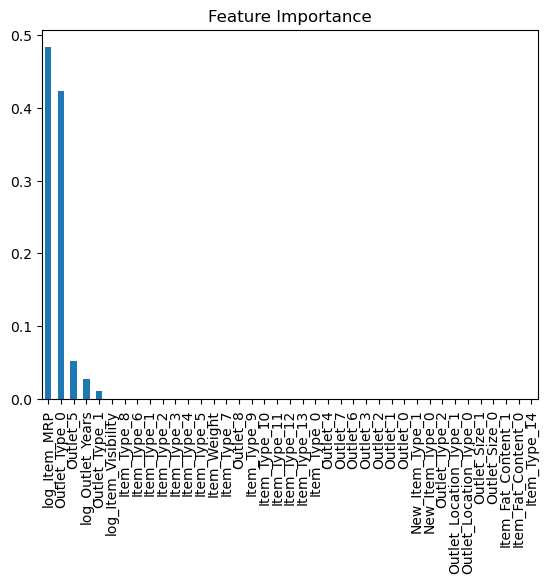

In [73]:
model = AdaBoostRegressor()
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.28607594318734914
RMSE: 0.5348606764264402


<AxesSubplot:title={'center':'Feature Importance'}>

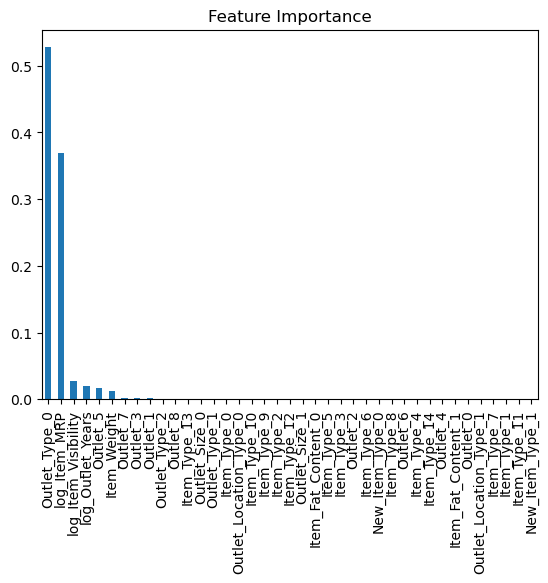

In [74]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=200)
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.2810681074499213
RMSE: 0.5301585682132481


<AxesSubplot:title={'center':'Feature Importance'}>

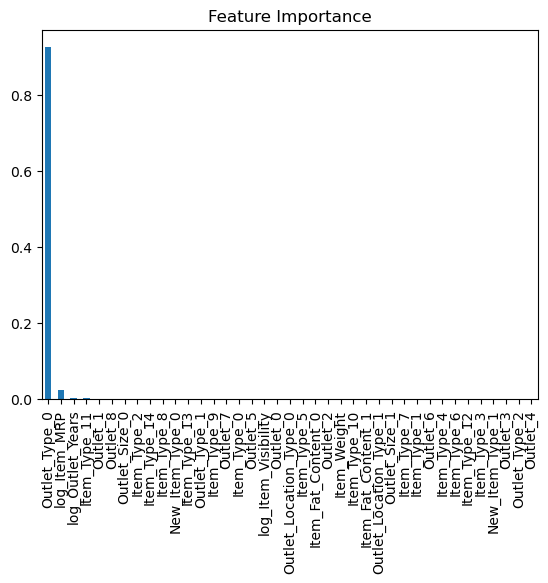

In [83]:
model = xgb.XGBRegressor(learning_rate=0.1)

train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [76]:
model.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [58]:
param_grid = {
    'base_estimator': [Lasso, DecisionTreeRegressor(max_depth=5), RandomForestRegressor(max_depth=5)],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [200]
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_norm, y)

best_estimator = grid_search.best_estimator_

print(best_estimator)

df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_

KeyboardInterrupt: 

# linear boosting

In [18]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

In [25]:
# Ridge Regression with Gradient Boosting
ridge = Ridge(alpha=1.0)
model = GradientBoostingRegressor(loss='lad', n_estimators=1000, learning_rate=0.01, max_depth=3, subsample=0.5, random_state=42)
train(model, X_norm, y)
# coef = pd.Series(model.coef_, X_norm.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2623506998057456
RMSE: 0.5122018155041483
CV Score: 0.27513550432138506


In [ ]:
# Lasso Regression with AdaBoost
lasso = Lasso(alpha=0.1)
lasso_ab = AdaBoostRegressor(base_estimator=lasso, n_estimators=1000, learning_rate=0.01, loss='linear', random_state=42)
# Elastic Net Regression with XGBoost
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=3, subsample=0.5, reg_alpha=0.1, reg_lambda=0.5, random_state=42)

# stack ensemble

In [182]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Base models 설정
base_models = [
    LinearRegression(fit_intercept = False),
    Ridge(alpha=10, max_iter=1000, solver='saga', fit_intercept=True, tol=0.001),
    Lasso(alpha=0.001, tol=1e-06, fit_intercept=True, max_iter=1000),
    DecisionTreeRegressor(max_depth=5, max_features=35),
    RandomForestRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=200),
    ExtraTreesRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=200),
    SVR(C= 0.007, epsilon= 0.005, kernel= 'linear')
]

# Meta-model 설정
meta_model = Ridge(fit_intercept=True)

# base-meta Split
X_base, X_meta, y_base, y_meta = train_test_split(X_norm, y, test_size=0.2, random_state=77)

X_base.reset_index(inplace=True, drop=True)
y_base.reset_index(drop=True, inplace=True)

In [183]:
# kf = KFold(n_splits=5, shuffle=True, random_state=77)
kf = KFold(n_splits=5, shuffle=False)
base_model_preds = [[],[],[],[],[],[],[]]
meta_model_preds = np.zeros((X_meta.shape[0], len(base_models)))

for train_idx, test_idx in kf.split(X_base):
    fold_preds = []
    
    X_train, X_test = X_base.loc[train_idx], X_base.loc[test_idx]
    y_train, y_test = y_base.loc[train_idx], y_base.loc[test_idx]
    
    for model in base_models:
        n = base_models.index(model)
        model.fit(X_train, y_train)
        base_model_preds[n].append(model.predict(X_test))
        meta_model_preds[:,n] += model.predict(X_meta)

for i in range(len(base_model_preds)):
    base_model_preds[i] = np.hstack(base_model_preds[i])

In [184]:
X_meta_train = pd.DataFrame(base_model_preds).T

In [185]:
meta_model = Ridge(alpha=0.1, fit_intercept=True, tol=0.0001)

In [186]:
meta_model = LinearRegression()

In [187]:
meta_model.fit(X_meta_train, y_base)

LinearRegression()

In [188]:
X_meta_test = meta_model_preds / 5

In [189]:
y_meta_test = meta_model.predict(X_meta_test)

print(mean_squared_error(y_meta, y_meta_test))

0.28135047971485927
